# Credit EDA Assignment

## Business Objective

- This assignment aims to identify factors contributing to loan defaults in the BFSI sector, helping financial institutions minimize losses by making informed lending decisions based on customer attributes and loan-related data through exploratory data analysis (EDA).

- This case study aims to identify patterns which indicate if a client has difficulty paying their instalments which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc. This will ensure that the consumers capable of repaying the loan are not rejected. Identification of such applicants using EDA is the aim of this case study.

# Importing the libraries.

In [1]:
#import the required librearies:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings('ignore')

# Application Data 

## Segment- 1, Data Cleaning

### 1.1 Data Reading & Data Types

In [3]:
#loading the data for "application_data"
inp0= pd.read_csv("application_data.csv")

In [4]:
#reading the dataset
inp0.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
#shape of the dataset
inp0.shape

(307511, 122)

In [6]:
# Set display options to show all columns and rows
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [7]:
#info of dataset
inp0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [8]:
# Mathematic parametes of the dataset
inp0.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

In [9]:
#Datatype
inp0.dtypes

SK_ID_CURR                        int64
TARGET                            int64
NAME_CONTRACT_TYPE               object
CODE_GENDER                      object
FLAG_OWN_CAR                     object
FLAG_OWN_REALTY                  object
CNT_CHILDREN                      int64
AMT_INCOME_TOTAL                float64
AMT_CREDIT                      float64
AMT_ANNUITY                     float64
AMT_GOODS_PRICE                 float64
NAME_TYPE_SUITE                  object
NAME_INCOME_TYPE                 object
NAME_EDUCATION_TYPE              object
NAME_FAMILY_STATUS               object
NAME_HOUSING_TYPE                object
REGION_POPULATION_RELATIVE      float64
DAYS_BIRTH                        int64
DAYS_EMPLOYED                     int64
DAYS_REGISTRATION               float64
DAYS_ID_PUBLISH                   int64
OWN_CAR_AGE                     float64
FLAG_MOBIL                        int64
FLAG_EMP_PHONE                    int64
FLAG_WORK_PHONE                   int64


### 1.2 Fixing the Rows and Columns 

In [10]:
# Identify missing value and rectify them
inp0.isnull().sum()

SK_ID_CURR                           0
TARGET                               0
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                         12
AMT_GOODS_PRICE                    278
NAME_TYPE_SUITE                   1292
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
OWN_CAR_AGE                     202929
FLAG_MOBIL                           0
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_CONT_MOBILE         

In [11]:
# Identify missing value percentage and rectify them
100*inp0.isnull().mean()

SK_ID_CURR                       0.000000
TARGET                           0.000000
NAME_CONTRACT_TYPE               0.000000
CODE_GENDER                      0.000000
FLAG_OWN_CAR                     0.000000
FLAG_OWN_REALTY                  0.000000
CNT_CHILDREN                     0.000000
AMT_INCOME_TOTAL                 0.000000
AMT_CREDIT                       0.000000
AMT_ANNUITY                      0.003902
AMT_GOODS_PRICE                  0.090403
NAME_TYPE_SUITE                  0.420148
NAME_INCOME_TYPE                 0.000000
NAME_EDUCATION_TYPE              0.000000
NAME_FAMILY_STATUS               0.000000
NAME_HOUSING_TYPE                0.000000
REGION_POPULATION_RELATIVE       0.000000
DAYS_BIRTH                       0.000000
DAYS_EMPLOYED                    0.000000
DAYS_REGISTRATION                0.000000
DAYS_ID_PUBLISH                  0.000000
OWN_CAR_AGE                     65.990810
FLAG_MOBIL                       0.000000
FLAG_EMP_PHONE                   0

In [12]:
#cut off at 45 percent so.whichever column has high missing value than 45 percent will be deleted
cut_off=45
cols_to_drop=list(inp0.columns[100*inp0.isnull().mean()>cut_off])
print(cols_to_drop)
print("No. of columns to be dropped:",len(cols_to_drop))

['OWN_CAR_AGE', 'EXT_SOURCE_1', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAREA_MEDI', 'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'TOTALAREA_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE

In [13]:
#columns drop
inp0=inp0.drop(cols_to_drop,axis=1)

In [14]:
#successfully droped column wich had missing value
inp0.shape

(307511, 73)

In [15]:
#finding uniqe column among 72 column
unique_column=list(inp0.columns[inp0.nunique()==inp0.shape[0]])
unique_column

['SK_ID_CURR']

In [16]:
#Total of categorical column
cat_cols=inp0.columns[inp0.nunique()<30]
len(cat_cols)

57

In [17]:
#Total of numerical column
num_cols=inp0.columns[inp0.nunique()>=30]
len(num_cols)

16

In [18]:
#handling missing  value with mode value using fillna method
for i in cat_cols:
    mod=inp0[i].mode()[0]
    inp0[i]=inp0[i].fillna(mod)

In [19]:
#null value chek
Null_value_column = inp0[['EXT_SOURCE_2','EXT_SOURCE_3','OBS_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE']].head()
Null_value_column

,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE
0,0.262949,0.139376,2.0,2.0
1,0.622246,NaN,1.0,1.0
2,0.555912,0.729567,0.0,0.0
3,0.650442,NaN,2.0,2.0
4,0.322738,NaN,0.0,0.0


In [20]:
#dropping the column for EXT_SOURCE_2 & 3
inp0.drop(columns=['EXT_SOURCE_3','EXT_SOURCE_2',], inplace=True)

In [21]:
#filling this column missing values with 0
inp0['AMT_GOODS_PRICE'] = inp0['AMT_GOODS_PRICE'].fillna(0)
inp0['OBS_30_CNT_SOCIAL_CIRCLE'] = inp0['OBS_30_CNT_SOCIAL_CIRCLE'].fillna(0)
inp0['OBS_60_CNT_SOCIAL_CIRCLE'] = inp0['OBS_60_CNT_SOCIAL_CIRCLE'].fillna(0)
inp0['AMT_ANNUITY'] = inp0['AMT_ANNUITY'].fillna(0)

In [22]:
#checking a null value
inp0.isnull().sum()

SK_ID_CURR                     0
TARGET                         0
NAME_CONTRACT_TYPE             0
CODE_GENDER                    0
FLAG_OWN_CAR                   0
FLAG_OWN_REALTY                0
CNT_CHILDREN                   0
AMT_INCOME_TOTAL               0
AMT_CREDIT                     0
AMT_ANNUITY                    0
AMT_GOODS_PRICE                0
NAME_TYPE_SUITE                0
NAME_INCOME_TYPE               0
NAME_EDUCATION_TYPE            0
NAME_FAMILY_STATUS             0
NAME_HOUSING_TYPE              0
REGION_POPULATION_RELATIVE     0
DAYS_BIRTH                     0
DAYS_EMPLOYED                  0
DAYS_REGISTRATION              0
DAYS_ID_PUBLISH                0
FLAG_MOBIL                     0
FLAG_EMP_PHONE                 0
FLAG_WORK_PHONE                0
FLAG_CONT_MOBILE               0
FLAG_PHONE                     0
FLAG_EMAIL                     0
OCCUPATION_TYPE                0
CNT_FAM_MEMBERS                0
REGION_RATING_CLIENT           0
REGION_RAT

In [23]:
#How many columns are left after dropping
inp0.shape

(307511, 71)

#### 1.2.1 Data Correction

In [24]:
#checking value for NAME_CONTRACT_TYPE
inp0.NAME_CONTRACT_TYPE.value_counts()

NAME_CONTRACT_TYPE
Cash loans         278232
Revolving loans     29279
Name: count, dtype: int64

In [25]:
#checking unique value for CODE_GENDER
inp0.CODE_GENDER.unique()

array(['M', 'F', 'XNA'], dtype=object)

In [26]:
#value count for CODE_GENDER
inp0.CODE_GENDER.value_counts()

CODE_GENDER
F      202448
M      105059
XNA         4
Name: count, dtype: int64

In [27]:
#inputing the missing values"XNA" in Gender "f"(female) with mode
inp0.CODE_GENDER.replace('XNA','F',inplace=True)

In [28]:
#value count for CODE_GENDER after correction
inp0.CODE_GENDER.value_counts()

CODE_GENDER
F    202452
M    105059
Name: count, dtype: int64

In [29]:
#checking value for FLAG_OWN_CAR
inp0.FLAG_OWN_CAR.value_counts()

FLAG_OWN_CAR
N    202924
Y    104587
Name: count, dtype: int64

In [30]:
#checking value for NAME_INCOME_TYPE
inp0.NAME_INCOME_TYPE.value_counts()

NAME_INCOME_TYPE
Working                 158774
Commercial associate     71617
Pensioner                55362
State servant            21703
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave              5
Name: count, dtype: int64

In [31]:
#checking value for NAME_EDUCATION_TYPE
inp0.NAME_EDUCATION_TYPE.value_counts()

NAME_EDUCATION_TYPE
Secondary / secondary special    218391
Higher education                  74863
Incomplete higher                 10277
Lower secondary                    3816
Academic degree                     164
Name: count, dtype: int64

In [32]:
#checking value for NAME_FAMILY_STATUS
inp0.NAME_FAMILY_STATUS.unique()

array(['Single / not married', 'Married', 'Civil marriage', 'Widow',
       'Separated', 'Unknown'], dtype=object)

In [33]:
#checking value for NAME_HOUSING_TYPE
inp0.NAME_HOUSING_TYPE.unique()

array(['House / apartment', 'Rented apartment', 'With parents',
       'Municipal apartment', 'Office apartment', 'Co-op apartment'],
      dtype=object)

In [34]:
#checking value for NAME_HOUSING_TYPE
inp0.NAME_HOUSING_TYPE.unique()

array(['House / apartment', 'Rented apartment', 'With parents',
       'Municipal apartment', 'Office apartment', 'Co-op apartment'],
      dtype=object)

In [35]:
# remove negative sign from columns
inp0[["DAYS_BIRTH", "DAYS_EMPLOYED", "DAYS_REGISTRATION", "DAYS_ID_PUBLISH"]] = inp0[["DAYS_BIRTH", "DAYS_EMPLOYED", "DAYS_REGISTRATION", "DAYS_ID_PUBLISH"]].abs()

In [36]:
#Imputing columns with their respective mean value
mean_value_1 = inp0['DAYS_BIRTH'].mean()
mean_value_2 = inp0['DAYS_EMPLOYED'].mean()
mean_value_3 = inp0['DAYS_ID_PUBLISH'].mean()
mean_value_4 = inp0['DAYS_REGISTRATION'].mean()

In [37]:
#Fill missing values in columns using fillna method
inp0['DAYS_BIRTH'].fillna(mean_value_1, inplace=True)
inp0['DAYS_EMPLOYED'].fillna(mean_value_2, inplace=True)
inp0['DAYS_ID_PUBLISH'].fillna(mean_value_2, inplace=True)
inp0['DAYS_REGISTRATION'].fillna(mean_value_2, inplace=True)

In [38]:
#checking value for OCCUPATION_TYPE
inp0.OCCUPATION_TYPE.value_counts()

OCCUPATION_TYPE
Laborers                 151577
Sales staff               32102
Core staff                27570
Managers                  21371
Drivers                   18603
High skill tech staff     11380
Accountants                9813
Medicine staff             8537
Security staff             6721
Cooking staff              5946
Cleaning staff             4653
Private service staff      2652
Low-skill Laborers         2093
Waiters/barmen staff       1348
Secretaries                1305
Realty agents               751
HR staff                    563
IT staff                    526
Name: count, dtype: int64

In [39]:
#checking value for ORGANIZATION_TYPE
inp0.ORGANIZATION_TYPE.value_counts()

ORGANIZATION_TYPE
Business Entity Type 3    67992
XNA                       55374
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7      

In [40]:
#replace XNA values with unknown
inp0.ORGANIZATION_TYPE.replace('XNA','Unknown',inplace=True)

# Previos Application Data

### 1.3 Data Reading & Data Types

In [41]:
#loading the data for "previous_application"
inp1= pd.read_csv("previous_application.csv")

In [42]:
#reading the dataset
inp1.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [43]:
#shape of the dataset
inp1.shape

(1670214, 37)

In [44]:
#info of data
inp1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [45]:
#Mathematic parametes of the dataset
inp1.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,7.743700e+05,1.284699e+06,1.670214e+06,1.670214e+06,774370.000000,5951.000000,5951.000000,1.670214e+06,1.670214e+06,1.297984e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,6.697402e+03,2.278473e+05,1.248418e+01,9.964675e-01,0.079637,0.188357,0.773503,-8.806797e+02,3.139511e+02,1.605408e+01,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,0.332570
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,2.092150e+04,3.153966e+05,3.334028e+00,5.932963e-02,0.107823,0.087671,0.100879,7.790997e+02,7.127443e+03,1.456729e+01,88916.115834,72444.869708,106857.034789,149647.415123,153303.516729,0.471134
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000015,0.034781,0.373150,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,0.000000e+00,5.084100e+04,1.000000e+01,1.000000e+00,0.000000,0.160716,0.715645,-1.300000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,0.000000
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.638000e+03,1.123200e+05,1.200000e+01,1.000000e+00,0.051605,0.189122,0.835095,-5.810000e+02,3.000000e+00,1.200000e+01,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,0.000000
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,7.740000e+03,2.340000e+05,1.500000e+01,1.000000e+00,0.108909,0.193330,0.852537,-2.800000e+02,8.200000e+01,2.400000e+01,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,1.000000
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,3.060045e+06,6.905160e+06,2.300000e+01,1.000000e+00,1.000000,1.000000,1.000000,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


In [46]:
#Datatype
inp1.dtypes

SK_ID_PREV                       int64
SK_ID_CURR                       int64
NAME_CONTRACT_TYPE              object
AMT_ANNUITY                    float64
AMT_APPLICATION                float64
AMT_CREDIT                     float64
AMT_DOWN_PAYMENT               float64
AMT_GOODS_PRICE                float64
WEEKDAY_APPR_PROCESS_START      object
HOUR_APPR_PROCESS_START          int64
FLAG_LAST_APPL_PER_CONTRACT     object
NFLAG_LAST_APPL_IN_DAY           int64
RATE_DOWN_PAYMENT              float64
RATE_INTEREST_PRIMARY          float64
RATE_INTEREST_PRIVILEGED       float64
NAME_CASH_LOAN_PURPOSE          object
NAME_CONTRACT_STATUS            object
DAYS_DECISION                    int64
NAME_PAYMENT_TYPE               object
CODE_REJECT_REASON              object
NAME_TYPE_SUITE                 object
NAME_CLIENT_TYPE                object
NAME_GOODS_CATEGORY             object
NAME_PORTFOLIO                  object
NAME_PRODUCT_TYPE               object
CHANNEL_TYPE             

### 1.4 Imput/Remove missing value

In [47]:
#Identify missing value and rectify them
inp1.isnull().sum()

SK_ID_PREV                           0
SK_ID_CURR                           0
NAME_CONTRACT_TYPE                   0
AMT_ANNUITY                     372235
AMT_APPLICATION                      0
AMT_CREDIT                           1
AMT_DOWN_PAYMENT                895844
AMT_GOODS_PRICE                 385515
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
RATE_DOWN_PAYMENT               895844
RATE_INTEREST_PRIMARY          1664263
RATE_INTEREST_PRIVILEGED       1664263
NAME_CASH_LOAN_PURPOSE               0
NAME_CONTRACT_STATUS                 0
DAYS_DECISION                        0
NAME_PAYMENT_TYPE                    0
CODE_REJECT_REASON                   0
NAME_TYPE_SUITE                 820405
NAME_CLIENT_TYPE                     0
NAME_GOODS_CATEGORY                  0
NAME_PORTFOLIO                       0
NAME_PRODUCT_TYPE                    0
CHANNEL_TYPE             

In [48]:
#Identify missing value percentage and rectify them
100*inp1.isnull().mean()

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    22.286665
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000060
AMT_DOWN_PAYMENT               53.636480
AMT_GOODS_PRICE                23.081773
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
RATE_DOWN_PAYMENT              53.636480
RATE_INTEREST_PRIMARY          99.643698
RATE_INTEREST_PRIVILEGED       99.643698
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_TYPE_SUITE                49.119754
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYP

In [49]:
#using a dropna method to delete a column with missing value
inp1.drop(columns=['RATE_DOWN_PAYMENT','RATE_INTEREST_PRIMARY','RATE_INTEREST_PRIVILEGED','PRODUCT_COMBINATION','AMT_DOWN_PAYMENT','NAME_TYPE_SUITE'],inplace=True)

In [50]:
#finding uniqe column among 37 column
unique_column1=list(inp0.columns[inp0.nunique()==inp0.shape[0]])
unique_column1

['SK_ID_CURR']

In [51]:
#Total of categorical column
cat_cols=inp1.columns[inp1.nunique()<30]
len(cat_cols)

17

In [52]:
#Total of numerical column
num_cols=inp1.columns[inp1.nunique()>=30]
len(num_cols)

14

In [53]:
#Imputing columns with their respective median value
median_value_1 = inp1['AMT_ANNUITY'].median()
median_value_2 = inp1['AMT_CREDIT'].median()
median_value_3 = inp1['AMT_GOODS_PRICE'].median()
median_value_4 = inp1['CNT_PAYMENT'].median()

In [54]:
#Fill missing values in columns using fillna method
inp1['AMT_ANNUITY'].fillna(median_value_1, inplace=True)
inp1['AMT_CREDIT'].fillna(median_value_2, inplace=True)
inp1['AMT_GOODS_PRICE'].fillna(median_value_2, inplace=True)
inp1['CNT_PAYMENT'].fillna(median_value_2, inplace=True)

In [55]:
#checking value for DAYS_FIRST_DRAWING
inp1.DAYS_FIRST_DRAWING.unique()

array([ 3.65243e+05,          nan, -2.77000e+02, ..., -1.61100e+03,
       -1.77000e+03, -1.87900e+03])

In [56]:
# coverting all the days values from negative to positive
inp1.DAYS_FIRST_DRAWING=abs(inp1.DAYS_FIRST_DRAWING)
inp1.DAYS_DECISION=abs(inp1.DAYS_DECISION)
inp1.DAYS_FIRST_DUE=abs(inp1.DAYS_FIRST_DUE)
inp1.DAYS_LAST_DUE=abs(inp1.DAYS_LAST_DUE)
inp1.DAYS_LAST_DUE_1ST_VERSION=abs(inp1.DAYS_LAST_DUE_1ST_VERSION)
inp1.DAYS_TERMINATION=abs(inp1.DAYS_TERMINATION)
inp1.SELLERPLACE_AREA=abs(inp1.SELLERPLACE_AREA)

In [57]:
#checking value for DAYS_FIRST_DUE
inp1.DAYS_FIRST_DUE.unique()

array([  42.,  134.,  271., ..., 2842., 1774., 2892.])

In [58]:
#Add a 0 in missing column using a fillna function
inp1['NFLAG_INSURED_ON_APPROVAL'] = inp1['NFLAG_INSURED_ON_APPROVAL'].fillna(0)

In [59]:
#checking null value
inp1.isnull().sum()

SK_ID_PREV                          0
SK_ID_CURR                          0
NAME_CONTRACT_TYPE                  0
AMT_ANNUITY                         0
AMT_APPLICATION                     0
AMT_CREDIT                          0
AMT_GOODS_PRICE                     0
WEEKDAY_APPR_PROCESS_START          0
HOUR_APPR_PROCESS_START             0
FLAG_LAST_APPL_PER_CONTRACT         0
NFLAG_LAST_APPL_IN_DAY              0
NAME_CASH_LOAN_PURPOSE              0
NAME_CONTRACT_STATUS                0
DAYS_DECISION                       0
NAME_PAYMENT_TYPE                   0
CODE_REJECT_REASON                  0
NAME_CLIENT_TYPE                    0
NAME_GOODS_CATEGORY                 0
NAME_PORTFOLIO                      0
NAME_PRODUCT_TYPE                   0
CHANNEL_TYPE                        0
SELLERPLACE_AREA                    0
NAME_SELLER_INDUSTRY                0
CNT_PAYMENT                         0
NAME_YIELD_GROUP                    0
DAYS_FIRST_DRAWING             673065
DAYS_FIRST_D

In [60]:
#How may columns are left after dropping
inp1.shape

(1670214, 31)

#### 1.4.1 Data Correction

In [61]:
#getting know the data
#checking data for WEEKDAY_APPR_PROCESS_START
inp1.WEEKDAY_APPR_PROCESS_START.unique()

array(['SATURDAY', 'THURSDAY', 'TUESDAY', 'MONDAY', 'FRIDAY', 'SUNDAY',
       'WEDNESDAY'], dtype=object)

In [62]:
#checking data for HOUR_APPR_PROCESS_START
inp1.HOUR_APPR_PROCESS_START.unique()

array([15, 11,  7,  9,  8, 10, 12, 13, 14, 16,  6,  4,  5, 19, 17, 18, 20,
       22, 21,  3,  1,  2, 23,  0], dtype=int64)

In [63]:
#checking data for FLAG_LAST_APPL_PER_CONTRACT
inp1.FLAG_LAST_APPL_PER_CONTRACT.unique()

array(['Y', 'N'], dtype=object)

In [64]:
#checking data for NFLAG_LAST_APPL_IN_DAY
inp1.NFLAG_LAST_APPL_IN_DAY.unique()

array([1, 0], dtype=int64)

In [65]:
#checking data for NAME_CASH_LOAN_PURPOSE
inp1.NAME_CASH_LOAN_PURPOSE.unique()

array(['XAP', 'XNA', 'Repairs', 'Everyday expenses', 'Car repairs',
       'Building a house or an annex', 'Other', 'Journey',
       'Purchase of electronic equipment', 'Medicine',
       'Payments on other loans', 'Urgent needs', 'Buying a used car',
       'Buying a new car', 'Buying a holiday home / land', 'Education',
       'Buying a home', 'Furniture', 'Buying a garage',
       'Business development', 'Wedding / gift / holiday', 'Hobby',
       'Gasification / water supply', 'Refusal to name the goal',
       'Money for a third person'], dtype=object)

In [66]:
#replace XNA and XAP value with unknown
inp1.NAME_CASH_LOAN_PURPOSE.replace(['XNA','XAP'],'Unknown',inplace=True)

In [67]:
#value count for NAME_CASH_LOAN_PURPOSE
inp1.NAME_CASH_LOAN_PURPOSE.value_counts()

NAME_CASH_LOAN_PURPOSE
Unknown                             1600579
Repairs                               23765
Other                                 15608
Urgent needs                           8412
Buying a used car                      2888
Building a house or an annex           2693
Everyday expenses                      2416
Medicine                               2174
Payments on other loans                1931
Education                              1573
Journey                                1239
Purchase of electronic equipment       1061
Buying a new car                       1012
Wedding / gift / holiday                962
Buying a home                           865
Car repairs                             797
Furniture                               749
Buying a holiday home / land            533
Business development                    426
Gasification / water supply             300
Buying a garage                         136
Hobby                                    55
Money for

In [68]:
#checking data for NAME_CLIENT_TYPE
inp1.NAME_CLIENT_TYPE.unique()

array(['Repeater', 'New', 'Refreshed', 'XNA'], dtype=object)

In [69]:
#replace XNA value with unknown
inp1.NAME_CLIENT_TYPE.replace('XNA','Unknown',inplace=True)

In [70]:
#checking data for NAME_CONTRACT_STATUS
inp1.NAME_CONTRACT_STATUS.value_counts()

NAME_CONTRACT_STATUS
Approved        1036781
Canceled         316319
Refused          290678
Unused offer      26436
Name: count, dtype: int64

The previous data indicates that we have following loan approvals, rejections, cancellations and unsued offers:
- Approved        1036781
- Canceled         316319
- Refused          290678
- Unused offer      26436

# Merging two data frames

In [71]:
#merge the file using inner join and new NAME inp2
inp2 = pd.merge(inp0,inp1, on=['SK_ID_CURR'], how='inner')
inp2.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START_x,HOUR_APPR_PROCESS_START_x,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,SK_ID_PREV,NAME_CONTRACT_TYPE_y,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_GOODS_PRICE_y,WEEKDAY_APPR_PROCESS_START_y,HOUR_APPR_PROCESS_START_y,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,3648.0,2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,1038818,Consumer loans,9251.775,179055.0,179055.0,179055.0,SATURDAY,9,Y,1,Unknown,Approved,606,XNA,XAP,New,Vehicles,POS,XNA,Stone,500,Auto technology,24.0,low_normal,365243.0,565.0,125.0,25.0,17.0,0.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1810518,Cash loans,98356.995,900000.0,1035882.0,900000.0,FRIDAY,12,Y,1,Unknown,Approved,746,XNA,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,1,XNA,12.0,low_normal,365243.0,716.0,386.0,536.0,527.0,1.0
2,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,2636178,Consumer loans,64567.665,337500.0,348637.5,337500.0,SUNDAY,17,Y,1,Unknown,Approved,828,Cash through the bank,XAP,Refreshed,Furniture,POS,XNA,Stone,1400,Furniture,6.0,middle,365243.0,797.0,647.0,647.0,639.0,0.0
3,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,2396755,Consumer loans,6737.310,68809.5,68053.5,68809.5,SATURDAY,15,Y,1,Unknown,Approved,2341,Cash through the bank,XAP,Refreshed,Consumer Electronics,POS,XNA,Country-wide,200,Consumer electronics,12.0

In [72]:
#shape of the dataset
inp2.shape

(1413701, 101)

In [73]:
# # loop method to Identify columns with only 0 and 1 values and drop it
# cols_to_drop = []
# for col in inp2.columns:
#     unique_values = inp2[col].unique()
#     if len(unique_values) == 2 and 0 in unique_values and 1 in unique_values:
#         cols_to_drop.append(col)
# inp2.drop(columns=cols_to_drop, inplace=True)
# print("No. of columns having only 0 and 1 & it's dropped:", len(cols_to_drop))
# print("dropped columns:", cols_to_drop)

-  
In my previous analysis, I initially used a'LOOP'  method involvin to iterate over each column that contain only the valuesg 0s and 1s to delete unnecessary columns. However, I realized that I mistakenly removed the 'TARGET' column, which is crucial as it contains information about defaulters and non-defaulters. To rectify this, I replaced the previous approach with a different method using the' dro'p function to eliminate the extra columns while retaining the 'TARGET' column.

In [74]:
#dropp the unnecessary columns
columns_to_drop = ['FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 
                   'FLAG_PHONE', 'FLAG_EMAIL', 'REG_REGION_NOT_LIVE_REGION', 
                   'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 
                   'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 
                   'LIVE_CITY_NOT_WORK_CITY', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 
                   'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 
                   'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 
                   'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 
                   'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 
                   'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 
                   'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21', 
                   'NFLAG_LAST_APPL_IN_DAY', 'NFLAG_INSURED_ON_APPROVAL','OBS_30_CNT_SOCIAL_CIRCLE',
                   'DEF_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE']

In [75]:
#using drop fuction
inp2.drop(columns=columns_to_drop, inplace=True)

In [76]:
#shape of the dataset after filering
inp2.shape

(1413701, 64)

In [77]:
#Datatype
inp2.dtypes

SK_ID_CURR                        int64
TARGET                            int64
NAME_CONTRACT_TYPE_x             object
CODE_GENDER                      object
FLAG_OWN_CAR                     object
FLAG_OWN_REALTY                  object
CNT_CHILDREN                      int64
AMT_INCOME_TOTAL                float64
AMT_CREDIT_x                    float64
AMT_ANNUITY_x                   float64
AMT_GOODS_PRICE_x               float64
NAME_TYPE_SUITE                  object
NAME_INCOME_TYPE                 object
NAME_EDUCATION_TYPE              object
NAME_FAMILY_STATUS               object
NAME_HOUSING_TYPE                object
REGION_POPULATION_RELATIVE      float64
DAYS_BIRTH                        int64
DAYS_EMPLOYED                     int64
DAYS_REGISTRATION               float64
DAYS_ID_PUBLISH                   int64
FLAG_MOBIL                        int64
OCCUPATION_TYPE                  object
CNT_FAM_MEMBERS                 float64
REGION_RATING_CLIENT              int64


- Merged the two dataframes using inner join, as we want all the analysis for the current data, so inner join will fetch all the data form the inp0 and inp1 dataframe.So, now in inp2 we have all the previous data from both applicatants.

## Segment- 2, Handling Outliers 

##### CNT_CHILDREN variable

In [78]:
#Treatment for CNT_CHILDREN data
inp2.CNT_CHILDREN.describe()

count    1.413701e+06
mean     4.048933e-01
std      7.173454e-01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      1.000000e+00
max      1.900000e+01
Name: CNT_CHILDREN, dtype: float64

<Axes: xlabel='CNT_CHILDREN'>

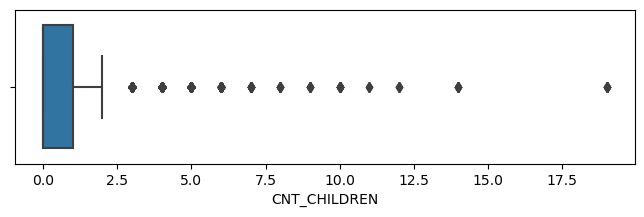

In [79]:
plt.figure(figsize=[8,2])
sns.boxplot(x=inp2['CNT_CHILDREN'])

In [80]:
Q3=inp2.CNT_CHILDREN.quantile(0.75)
Q1=inp2.CNT_CHILDREN.quantile(0.25)
IQR=Q3-Q1
IQR
upperbound=Q3+1.5*IQR
lowerbound=Q1-1.5*IQR
print (IQR,upperbound,lowerbound)

1.0 2.5 -1.5


In [81]:
inp2.CNT_CHILDREN=np.where(inp2.CNT_CHILDREN>upperbound,upperbound,inp2.CNT_CHILDREN)
inp2.CNT_CHILDREN=np.where(inp2.CNT_CHILDREN<lowerbound,lowerbound,inp2.CNT_CHILDREN)

- capped this outliers with upper whisker as it has more outlier than upper whisker.

<Axes: xlabel='CNT_CHILDREN'>

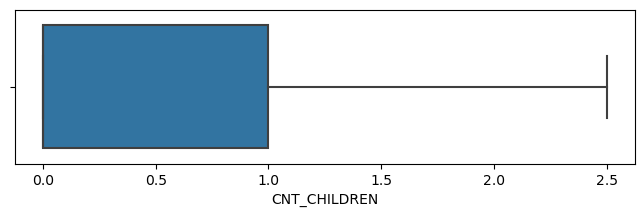

In [82]:
plt.figure(figsize=[8,2])
sns.boxplot(x=inp2['CNT_CHILDREN'])

##### AMT_INCOME_TOTAL variable

In [83]:
#Treatment for AMT_INCOME_TOTAL data
inp2.AMT_INCOME_TOTAL.describe()

count    1.413701e+06
mean     1.733160e+05
std      1.985734e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.575000e+05
75%      2.070000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

<Axes: xlabel='AMT_INCOME_TOTAL'>

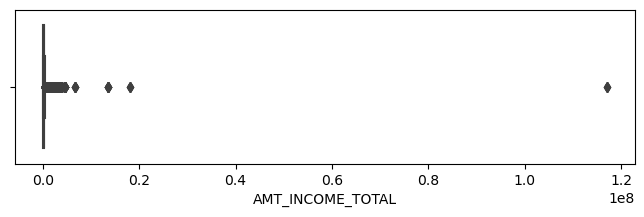

In [84]:
plt.figure(figsize=[8,2])
sns.boxplot(x=inp2['AMT_INCOME_TOTAL'])

In [85]:
Q3=inp2.AMT_INCOME_TOTAL.quantile(0.75)
Q1=inp2.AMT_INCOME_TOTAL.quantile(0.25)
IQR=Q3-Q1
upperbound=Q3+1.5*IQR
lowerbound=Q1-1.5*IQR
print (IQR,upperbound,lowerbound)

94500.0 348750.0 -29250.0


In [86]:
# filtering the number of outliers
A=inp2.AMT_INCOME_TOTAL>upperbound
A.value_counts(normalize=True)

AMT_INCOME_TOTAL
False    0.954518
True     0.045482
Name: proportion, dtype: float64

In [87]:
B=inp2.AMT_INCOME_TOTAL<lowerbound
B.value_counts()

AMT_INCOME_TOTAL
False    1413701
Name: count, dtype: int64

- we can impute these outliers with the upper whisker value i.e. the upper bound value. So that all the outliers in line

In [88]:
inp2.AMT_INCOME_TOTAL=np.where(inp2.AMT_INCOME_TOTAL>upperbound,upperbound,inp2.AMT_INCOME_TOTAL)

<Axes: xlabel='AMT_INCOME_TOTAL'>

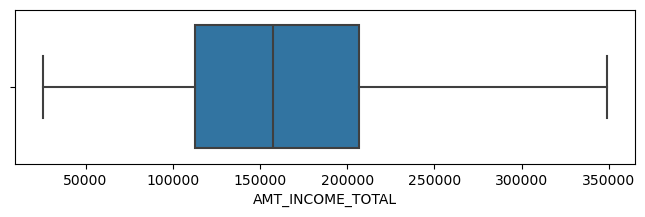

In [89]:
plt.figure(figsize=[8,2])
sns.boxplot(x=inp2['AMT_INCOME_TOTAL'])

##### AMT_GOODS_PRICE_x variable

In [90]:
#Treatment for AMT_GOODS_PRICE data
inp2.AMT_GOODS_PRICE_x.describe()

count    1.413701e+06
mean     5.272677e+05
std      3.534321e+05
min      0.000000e+00
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE_x, dtype: float64

<Axes: xlabel='AMT_GOODS_PRICE_x'>

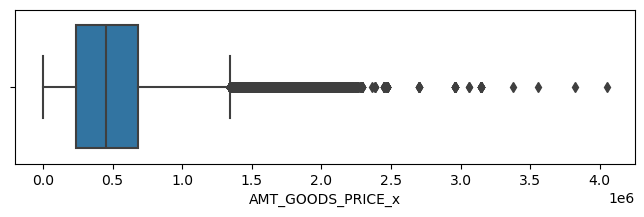

In [91]:
plt.figure(figsize=[8,2])
sns.boxplot(x=inp2['AMT_GOODS_PRICE_x'])

In [92]:
Q3=inp2.AMT_GOODS_PRICE_x.quantile(0.75)
Q1=inp2.AMT_GOODS_PRICE_x.quantile(0.25)
IQR=Q3-Q1
upperbound=Q3+1.5*IQR
lowerbound=Q1-1.5*IQR
print (IQR,upperbound,lowerbound)

441000.0 1341000.0 -423000.0


In [93]:
inp2.AMT_GOODS_PRICE_x=np.where(inp2.AMT_GOODS_PRICE_x>upperbound,upperbound,inp2.AMT_GOODS_PRICE_x)

<Axes: xlabel='AMT_GOODS_PRICE_x'>

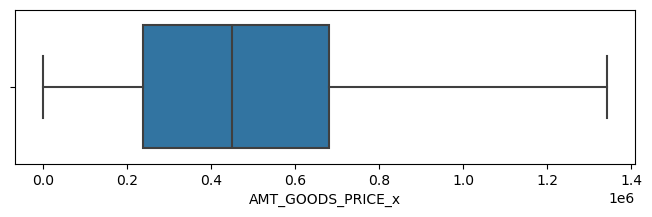

In [94]:
plt.figure(figsize=[8,2])
sns.boxplot(x=inp2['AMT_GOODS_PRICE_x'])

##### AMT_CREDIT_x variable

In [95]:
#Treatment for AMT_CREDIT_x data
inp2.AMT_CREDIT_x.describe()

count    1.413701e+06
mean     5.875537e+05
std      3.849173e+05
min      4.500000e+04
25%      2.700000e+05
50%      5.084955e+05
75%      8.079840e+05
max      4.050000e+06
Name: AMT_CREDIT_x, dtype: float64

<Axes: xlabel='AMT_CREDIT_x'>

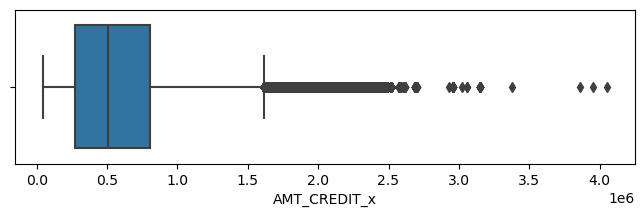

In [96]:
plt.figure(figsize=[8,2])
sns.boxplot(x=inp2['AMT_CREDIT_x'])

In [97]:
Q3=inp2.AMT_CREDIT_x.quantile(0.75)
Q1=inp2.AMT_CREDIT_x.quantile(0.25)
IQR=Q3-Q1
upperbound=Q3+1.5*IQR
lowerbound=Q1-1.5*IQR
print (IQR,upperbound,lowerbound)

537984.0 1614960.0 -536976.0


In [98]:
inp2.AMT_CREDIT_x=np.where(inp2.AMT_CREDIT_x>upperbound,upperbound,inp2.AMT_CREDIT_x)

<Axes: xlabel='AMT_CREDIT_x'>

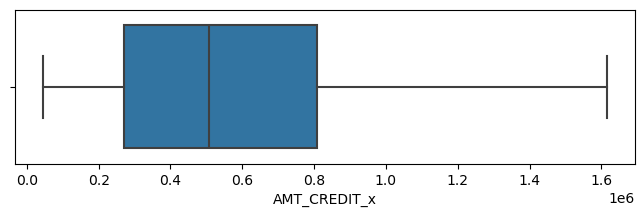

In [99]:
plt.figure(figsize=[8,2])
sns.boxplot(x=inp2['AMT_CREDIT_x'])

##### AMT_ANNUITY_x variable

In [100]:
#Treatment for AMT_ANNUITY_x data
inp2.AMT_ANNUITY_x.describe()

count    1.413701e+06
mean     2.701524e+04
std      1.395243e+04
min      0.000000e+00
25%      1.681650e+04
50%      2.492550e+04
75%      3.454200e+04
max      2.250000e+05
Name: AMT_ANNUITY_x, dtype: float64

<Axes: xlabel='AMT_ANNUITY_x'>

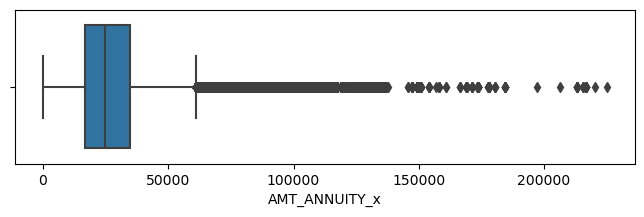

In [101]:
plt.figure(figsize=[8,2])
sns.boxplot(x=inp2['AMT_ANNUITY_x'])

In [102]:
Q3=inp2.AMT_ANNUITY_x.quantile(0.75)
Q1=inp2.AMT_ANNUITY_x.quantile(0.25)
IQR=Q3-Q1
upperbound=Q3+1.5*IQR
lowerbound=Q1-1.5*IQR
print (IQR,upperbound,lowerbound)

17725.5 61130.25 -9771.75


In [103]:
inp2.AMT_ANNUITY_x=np.where(inp2.AMT_ANNUITY_x>upperbound,upperbound,inp2.AMT_ANNUITY_x)

<Axes: xlabel='AMT_ANNUITY_x'>

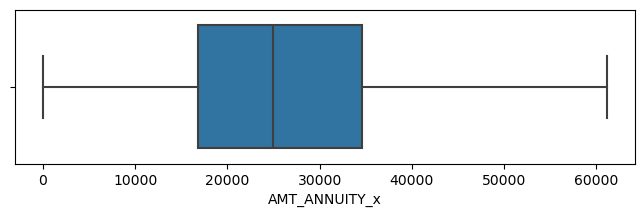

In [104]:
plt.figure(figsize=[8,2])
sns.boxplot(x=inp2['AMT_ANNUITY_x'])

##### CNT_FAM_MEMBERS variable

In [105]:
#Treatment for CNT_FAM_MEMBERS data
inp2.CNT_FAM_MEMBERS.describe()

count    1.413701e+06
mean     2.150501e+00
std      9.006787e-01
min      1.000000e+00
25%      2.000000e+00
50%      2.000000e+00
75%      3.000000e+00
max      2.000000e+01
Name: CNT_FAM_MEMBERS, dtype: float64

<Axes: xlabel='CNT_FAM_MEMBERS'>

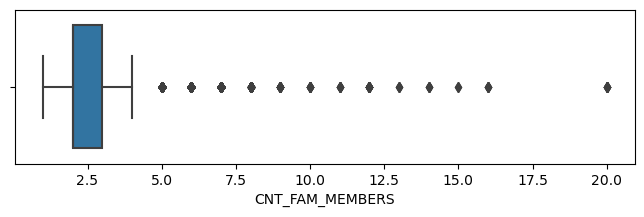

In [106]:
plt.figure(figsize=[8,2])
sns.boxplot(x=inp2['CNT_FAM_MEMBERS'])

In [107]:
Q3=inp2.CNT_FAM_MEMBERS.quantile(0.75)
Q1=inp2.CNT_FAM_MEMBERS.quantile(0.25)
IQR=Q3-Q1
upperbound=Q3+1.5*IQR
lowerbound=Q1-1.5*IQR
print (IQR,upperbound,lowerbound)

1.0 4.5 0.5


In [108]:
inp2.CNT_FAM_MEMBERS=np.where(inp2.CNT_FAM_MEMBERS>upperbound,upperbound,inp2.CNT_FAM_MEMBERS)

<Axes: xlabel='CNT_FAM_MEMBERS'>

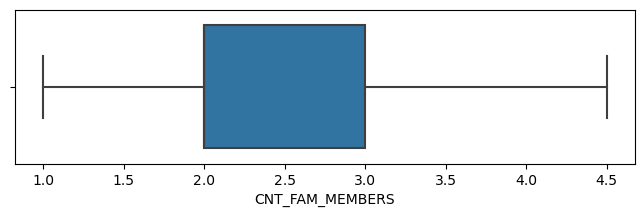

In [109]:
plt.figure(figsize=[8,2])
sns.boxplot(x=inp2['CNT_FAM_MEMBERS'])

##### DAYS_BIRTH & DAYS_ID_PUBLISH & REGION_POPULATION_RELATIVE variable

<Axes: >

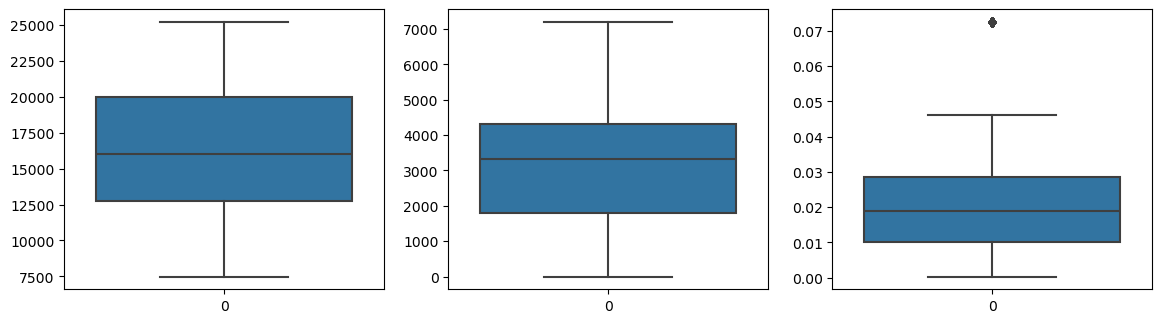

In [110]:
# Checking outliers in DAYS columsn and REGION_POPULATION_RELATIVE
plt.figure(figsize=(19,8))
plt.subplot(2,4,1)
sns.boxplot(inp2.DAYS_BIRTH)
plt.subplot(2,4,2)
sns.boxplot(inp2.DAYS_ID_PUBLISH)
plt.subplot(2,4,3)
sns.boxplot(inp2.REGION_POPULATION_RELATIVE)

##### AMT_ANNUITY_y variable

In [111]:
#Treatment for AMT_ANNUITY_y data
inp2['AMT_ANNUITY_y'].describe()

count    1.413701e+06
mean     1.484032e+04
std      1.316370e+04
min      0.000000e+00
25%      7.406055e+03
50%      1.125000e+04
75%      1.674797e+04
max      4.180581e+05
Name: AMT_ANNUITY_y, dtype: float64

<Axes: xlabel='AMT_ANNUITY_y'>

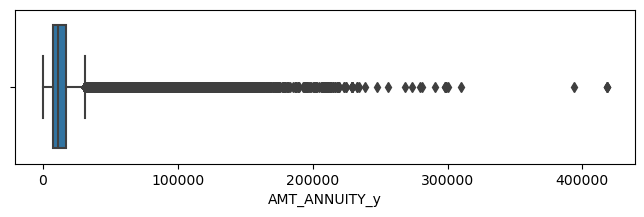

In [112]:
plt.figure(figsize=[8,2])
sns.boxplot(x=inp2['AMT_ANNUITY_y'])

In [113]:
Q3=inp2.AMT_ANNUITY_y.quantile(0.75)
Q1=inp2.AMT_ANNUITY_y.quantile(0.25)
IQR=Q3-Q1
upperbound=Q3+1.5*IQR
lowerbound=Q1-1.5*IQR
print (IQR,upperbound,lowerbound)

9341.91 30760.83 -6606.8099999999995


In [114]:
inp2.AMT_ANNUITY_y=np.where(inp2.AMT_ANNUITY_y>upperbound,upperbound,inp2.AMT_ANNUITY_y)

<Axes: xlabel='AMT_ANNUITY_y'>

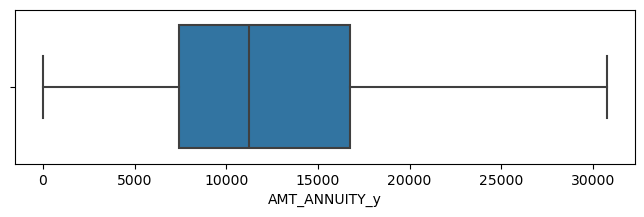

In [115]:
plt.figure(figsize=[8,2])
sns.boxplot(x=inp2['AMT_ANNUITY_y'])

##### AMT_CREDIT_y variable

In [116]:
#Treatment for AMT_CREDIT_y data
inp2['AMT_CREDIT_y'].describe()

count    1.413701e+06
mean     1.963540e+05
std      3.194812e+05
min      0.000000e+00
25%      2.488050e+04
50%      8.059500e+04
75%      2.156400e+05
max      4.509688e+06
Name: AMT_CREDIT_y, dtype: float64

<Axes: xlabel='AMT_CREDIT_y'>

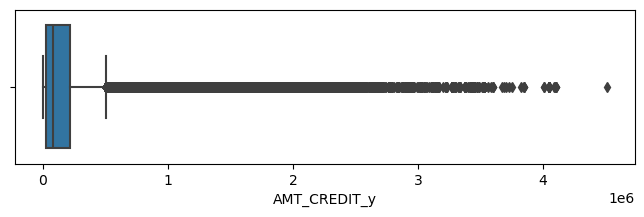

In [117]:
plt.figure(figsize=[8,2])
sns.boxplot(x=inp2['AMT_CREDIT_y'])

In [118]:
Q3=inp2.AMT_CREDIT_y.quantile(0.75)
Q1=inp2.AMT_CREDIT_y.quantile(0.25)
IQR=Q3-Q1
upperbound=Q3+1.5*IQR
lowerbound=Q1-1.5*IQR
print (IQR,upperbound,lowerbound)

190759.5 501779.25 -261258.75


In [119]:
inp2.AMT_CREDIT_y=np.where(inp2.AMT_CREDIT_y>upperbound,upperbound,inp2.AMT_CREDIT_y)

<Axes: xlabel='AMT_CREDIT_y'>

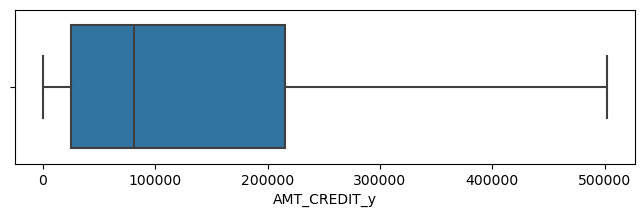

In [120]:
plt.figure(figsize=[8,2])
sns.boxplot(x=inp2['AMT_CREDIT_y'])

##### AMT_GOODS_PRICE_y variable

In [121]:
#Treatment for AMT_GOODS_PRICE_y data
inp2['AMT_GOODS_PRICE_y'].describe()

count    1.413701e+06
mean     1.934725e+05
std      2.845704e+05
min      0.000000e+00
25%      6.637500e+04
50%      8.054100e+04
75%      1.800000e+05
max      5.850000e+06
Name: AMT_GOODS_PRICE_y, dtype: float64

<Axes: xlabel='AMT_GOODS_PRICE_y'>

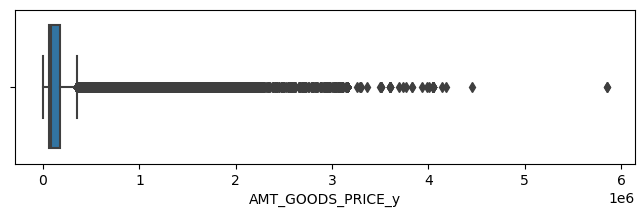

In [122]:
plt.figure(figsize=[8,2])
sns.boxplot(x=inp2['AMT_GOODS_PRICE_y'])

In [123]:
Q3=inp2.AMT_GOODS_PRICE_y.quantile(0.75)
Q1=inp2.AMT_GOODS_PRICE_y.quantile(0.25)
IQR=Q3-Q1
upperbound=Q3+1.5*IQR
lowerbound=Q1-1.5*IQR
print (IQR,upperbound,lowerbound)

113625.0 350437.5 -104062.5


In [124]:
inp2.AMT_GOODS_PRICE_y=np.where(inp2.AMT_GOODS_PRICE_y>upperbound,upperbound,inp2.AMT_GOODS_PRICE_y)

<Axes: xlabel='AMT_GOODS_PRICE_y'>

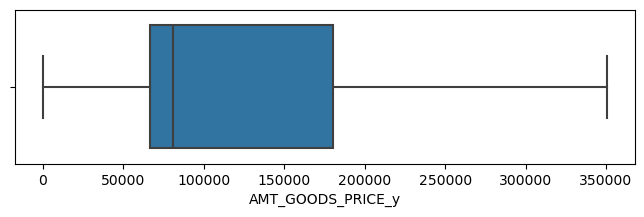

In [125]:
plt.figure(figsize=[8,2])
sns.boxplot(x=inp2['AMT_GOODS_PRICE_y'])

## Segment- 3. Binning

##### creating bins for age column

In [126]:
#creating a new column age by converting DAYS_BIRTH into years
inp2['Age']=round(inp2.DAYS_BIRTH/365)

In [127]:
inp2.Age=pd.cut(inp2.Age,bins=[20,30,40,50,60,70],labels=['<30','30-40','40-50','50-60','>60'])

In [128]:
inp2.Age.value_counts()

Age
30-40    373693
40-50    354020
50-60    319602
<30      197861
>60      168525
Name: count, dtype: int64

<Axes: xlabel='Age'>

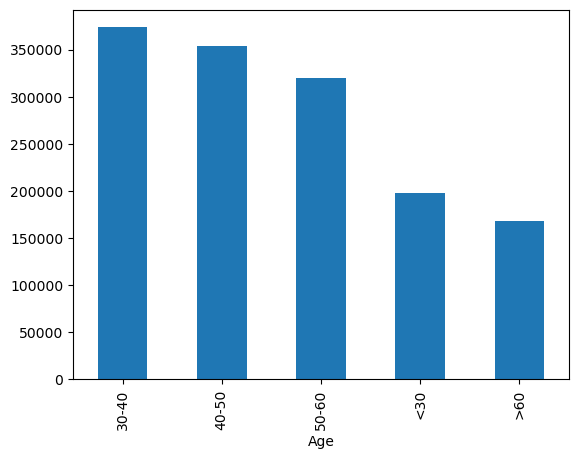

In [129]:
inp2.Age.value_counts().plot.bar()

-  
The bar plot illustrates that the largest proportion of individuals seeking loans falls within the middle-aged category, followed by young adults and the elderly.






##### creating bins for income column

In [130]:
inp2['INCOME_CATEGORY']=pd.cut(inp2.AMT_INCOME_TOTAL,bins=5,labels=['Very Low','Low','Medium','High','Very High'])

In [131]:
inp2.INCOME_CATEGORY.value_counts()

INCOME_CATEGORY
Low          440651
Medium       407832
Very Low     225337
High         210882
Very High    128999
Name: count, dtype: int64

<Axes: xlabel='INCOME_CATEGORY'>

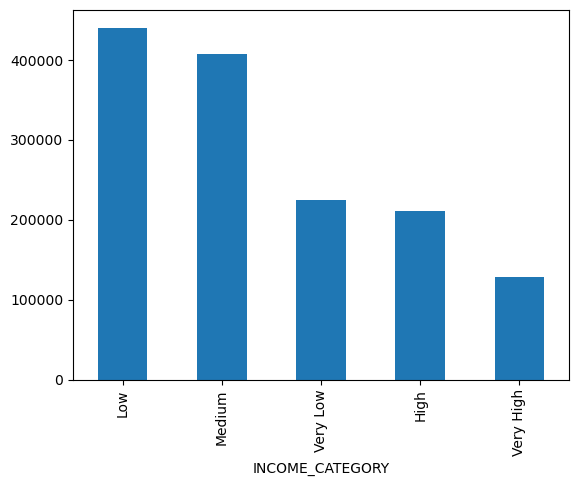

In [132]:
inp2.INCOME_CATEGORY.value_counts().plot.bar()

-  The bar plot suggests that individuals with lower incomes are more likely to seek loans from banks and financial institutions.

##### creating bins for Credit column

In [133]:
inp2['CREDIT_CATEGORY']=pd.cut(inp2.AMT_CREDIT_x,bins=5,labels=['Very Low','Low','Medium','High','Very High'])

In [134]:
inp2.CREDIT_CATEGORY.value_counts()

CREDIT_CATEGORY
Very Low     499917
Low          410587
Medium       280822
High         145679
Very High     76696
Name: count, dtype: int64

<Axes: xlabel='CREDIT_CATEGORY'>

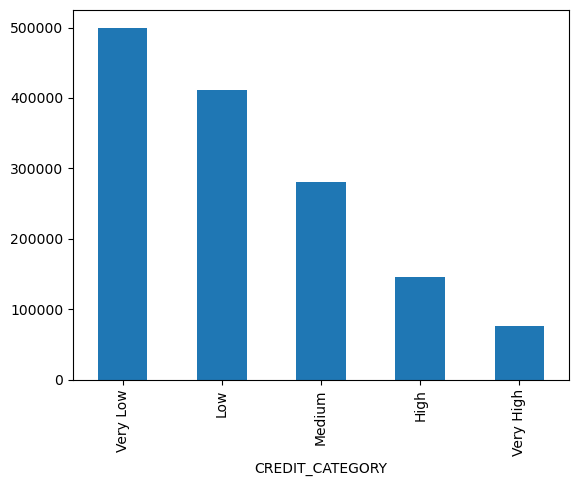

In [135]:
inp2.CREDIT_CATEGORY.value_counts().plot.bar()

-  The bar plot reveals that the majority of individuals have applied for small loan amounts, indicating that the credit taken by people is generally low.

##### Gender

In [136]:
#checking Gender data
inp2.CODE_GENDER.value_counts(normalize=True)

CODE_GENDER
F    0.675669
M    0.324331
Name: proportion, dtype: float64

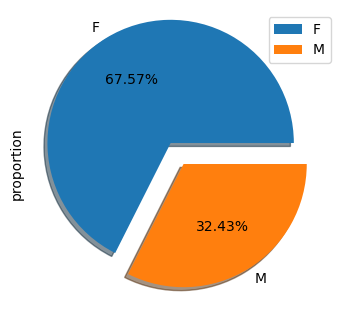

In [137]:
plt.figure(figsize=(4,4))
inp2.CODE_GENDER.value_counts(normalize=True).plot.pie(autopct='%.2f%%',explode=[0.2,0],shadow=True)
plt.legend()

-  The pie plot for the 'CODE_GENDER' variable across males and females reveals that both groups exhibit a similar distribution in terms of gender. Among defaulters, females(67.57%) slightly outnumber males(32.43%), males are slightly more prevalent than females. However, the difference in gender distribution between males and females is not substantial.

##### TARGET

In [138]:
#checking value for TARGET column as it gives information about 1 - client with payment difficulties: he/she had late payment more than X days on at least one of the first Y installments of the loan in our sample, 0 - all other cases)
inp0.TARGET.value_counts(normalize=True)

TARGET
0    0.919271
1    0.080729
Name: proportion, dtype: float64

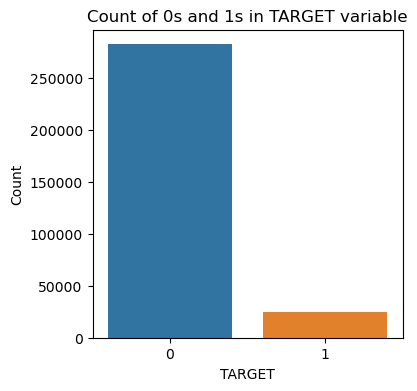

In [139]:
plt.figure(figsize=(4, 4))
sns.countplot(data=inp0, x='TARGET')
plt.xlabel('TARGET')
plt.ylabel('Count')
plt.title('Count of 0s and 1s in TARGET variable')
plt.show()

-  The count plot representing the 'TARGET' variable across defaulters and non-defaulters illustrates a significant class imbalance. Defaulters constitute a minority, while the majority of individuals, are non-defaulters.

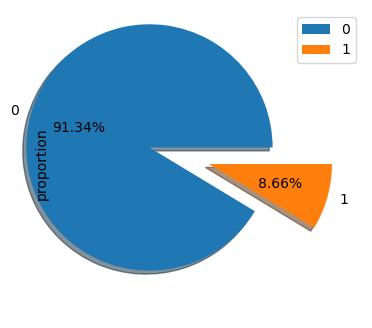

In [140]:
#Since the count plot may not provide a clear visual representation due to the class imbalance,so, look in to pie plot for a more concise overview.
plt.figure(figsize=(4,4))
inp2.TARGET.value_counts(normalize=True).plot.pie(autopct='%.2f%%',explode=[0.5,0],shadow=True)
plt.legend()

-  The pie plot illustrating,in the application data, the target variable suggests that the proportion of defaulters is considerably low, accounting for only 8.66% of the total dataset. In contrast, the majority of individuals in the dataset, comprising 91.34%, are non-defaulters.

# Dataset Analysis

## Segment- 4. Analysis

### Univariate Analysis

-  As, we got information in target data about defaulters and Non-defaulters so from here we will Divide the data set(for better and clear visualization) into 2 subsets one for Target value=1(defaulters) and other for target value=0(non defaulters)

In [141]:
#division of dataset in to defaulters and non-defaulters
inp2.head()
inp3 =inp2[inp2.TARGET==1]  # subset dataframe for defaulters
inp4 =inp2[inp2.TARGET==0]  # subset dataframe for non defaulters

In [142]:
#defaulters dataset
inp3.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START_x,HOUR_APPR_PROCESS_START_x,ORGANIZATION_TYPE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,SK_ID_PREV,NAME_CONTRACT_TYPE_y,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_GOODS_PRICE_y,WEEKDAY_APPR_PROCESS_START_y,HOUR_APPR_PROCESS_START_y,FLAG_LAST_APPL_PER_CONTRACT,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,Age,INCOME_CATEGORY,CREDIT_CATEGORY
0,100002,1,Cash loans,M,N,Y,0.0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,3648.0,2120,1,Laborers,1.0,2,2,WEDNESDAY,10,Business Entity Type 3,-1134.0,0.0,0.0,0.0,0.0,0.0,1.0,1038818,Consumer loans,9251.775,179055.0,179055.00,179055.0,SATURDAY,9,Y,Unknown,Approved,606,XNA,XAP,New,Vehicles,POS,XNA,Stone,500,Auto technology,24.0,low_normal,365243.0,565.0,125.0,25.0,17.0,<30,Medium,Low
161,100047,1,Cash loans,M,N,Y,0.0,202500.0,1193580.0,35028.0,855000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.025164,17482,1262,1182.0,1029,1,Laborers,2.0,2,2,TUESDAY,9,Business Entity Type 3,-1075.0,0.0,0.0,0.0,2.0,0.0,4.0,1472630,Revolving loans,22500.000,0.0,450000.00,80541.0,SATURDAY,14,Y,Unknown,Approved,1172,XNA,XAP,Repeater,XNA,Cards,x-sell,Credit and cash offices,1,XNA,0.0,XNA,365243.0,365243.0,365243.0,365243.0,365243.0,40-50,Medium,High
162,100047,1,Cash loans,M,N,Y,0.0,202500.0,1193580.0,35028.0,855000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.025164,17482,1262,1182.0,1029,1,Laborers,2.0,2,2,TUESDAY,9,Business Entity Type 3,-1075.0,0.0,0.0,0.0,2.0,0.0,4.0,2426800,Cash loans,11117.700,157500.0,157500.00,157500.0,FRIDAY,15,Y,Unknown,Approved,1467,Cash through the bank,XAP,Refreshed,XNA,Cash,x-sell,Credit and cash offices,1,XNA,24.0,high,365243.0,1437.0,747.0,1167.0,1163.0,40-50,Medium,High
163,100047,1,Cash loans,M,N,Y,0.0,202500.0,1193580.0,35028.0,855000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.025164,17482,1262,1182.0,1029,1,Laborers,2.0,2,2,TUESDAY,9,Business Entity Type 3,-1075.0,0.0,0.0,0.0,2.0,0.0,4.0,1021215,Cash loans,30760.830,675000.0,501779.25,350437.5,FRIDAY,11,Y,Unknown,Refused,1075,Cash through the bank,LIMIT,Repeater,XNA,Cash,walk-in,Credit and cash offices,1,XNA,36.0,low_normal,NaN,NaN,NaN,NaN,NaN,40-50,Medium,High
164,100047,1,Cash loans,M,N,Y,0.0,202500.0,1193580.0,35028.0,855000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.025164,17482,1262,1182.0,1029,1,Laborers,2.0,2,2,TUESDAY,9,Business Entity Type 3,-1075.0,0.0,0.0,0.0,2.0,0.0,4.0,1035321,Consumer loans,4586.895,38205.0,34384.50,38205.0,SUNDAY,12,Y,Unknown,Approved,2634,Cash through the bank,XAP,New,Photo / Cinema Equipment,POS,XNA,Country-wide,27,Connectivity,10.0,low_normal,365243.0,2601.0,2331.0,2331.0,2326.0,40-50,Medium,High


In [143]:
#non-defaulters dataset
inp4.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START_x,HOUR_APPR_PROCESS_START_x,ORGANIZATION_TYPE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,SK_ID_PREV,NAME_CONTRACT_TYPE_y,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_GOODS_PRICE_y,WEEKDAY_APPR_PROCESS_START_y,HOUR_APPR_PROCESS_START_y,FLAG_LAST_APPL_PER_CONTRACT,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,Age,INCOME_CATEGORY,CREDIT_CATEGORY
1,100003,0,Cash loans,F,N,N,0.0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,1,Core staff,2.0,1,1,MONDAY,11,School,-828.0,0.0,0.0,0.0,0.0,0.0,0.0,1810518,Cash loans,30760.83,900000.0,501779.25,350437.5,FRIDAY,12,Y,Unknown,Approved,746,XNA,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,1,XNA,12.0,low_normal,365243.0,716.0,386.0,536.0,527.0,40-50,High,High
2,100003,0,Cash loans,F,N,N,0.0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,1,Core staff,2.0,1,1,MONDAY,11,School,-828.0,0.0,0.0,0.0,0.0,0.0,0.0,2636178,Consumer loans,30760.83,337500.0,348637.50,337500.0,SUNDAY,17,Y,Unknown,Approved,828,Cash through the bank,XAP,Refreshed,Furniture,POS,XNA,Stone,1400,Furniture,6.0,middle,365243.0,797.0,647.0,647.0,639.0,40-50,High,High
3,100003,0,Cash loans,F,N,N,0.0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,1,Core staff,2.0,1,1,MONDAY,11,School,-828.0,0.0,0.0,0.0,0.0,0.0,0.0,2396755,Consumer loans,6737.31,68809.5,68053.50,68809.5,SATURDAY,15,Y,Unknown,Approved,2341,Cash through the bank,XAP,Refreshed,Consumer Electronics,POS,XNA,Country-wide,200,Consumer electronics,12.0,middle,365243.0,2310.0,1980.0,1980.0,1976.0,40-50,High,High
4,100004,0,Revolving loans,M,Y,Y,0.0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046,225,4260.0,2531,1,Laborers,1.0,2,2,MONDAY,9,Government,-815.0,0.0,0.0,0.0,0.0,0.0,0.0,1564014,Consumer loans,5357.25,24282.0,20106.00,24282.0,FRIDAY,5,Y,Unknown,Approved,815,Cash through the bank,XAP,New,Mobile,POS,XNA,Regional / Local,30,Connectivity,4.0,middle,365243.0,784.0,694.0,724.0,714.0,50-60,Very Low,Very Low
5,100006,0,Cash loans,F,N,Y,0.0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,19005,3039,9833.0,2437,1,Laborers,2.0,2,2,WEDNESDAY,17,Business Entity Type 3,-617.0,0.0,0.0,0.0,0.0,0.0,0.0,2078043,Cash loans,24246.00,675000.0,501779.25,350437.5,THURSDAY,15,Y,Unknown,Approved,181,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,1,XNA,48.0,low_normal,365243.0,151.0,1259.0,151.0,143.0,50-60,Low,Very Low


In [144]:
inp3.dtypes

SK_ID_CURR                         int64
TARGET                             int64
NAME_CONTRACT_TYPE_x              object
CODE_GENDER                       object
FLAG_OWN_CAR                      object
FLAG_OWN_REALTY                   object
CNT_CHILDREN                     float64
AMT_INCOME_TOTAL                 float64
AMT_CREDIT_x                     float64
AMT_ANNUITY_x                    float64
AMT_GOODS_PRICE_x                float64
NAME_TYPE_SUITE                   object
NAME_INCOME_TYPE                  object
NAME_EDUCATION_TYPE               object
NAME_FAMILY_STATUS                object
NAME_HOUSING_TYPE                 object
REGION_POPULATION_RELATIVE       float64
DAYS_BIRTH                         int64
DAYS_EMPLOYED                      int64
DAYS_REGISTRATION                float64
DAYS_ID_PUBLISH                    int64
FLAG_MOBIL                         int64
OCCUPATION_TYPE                   object
CNT_FAM_MEMBERS                  float64
REGION_RATING_CL

##### Target vs NAME_CONTRACT_TYPE_x

<Axes: title={'center': 'Non Defaulters'}, xlabel='NAME_CONTRACT_TYPE_x'>

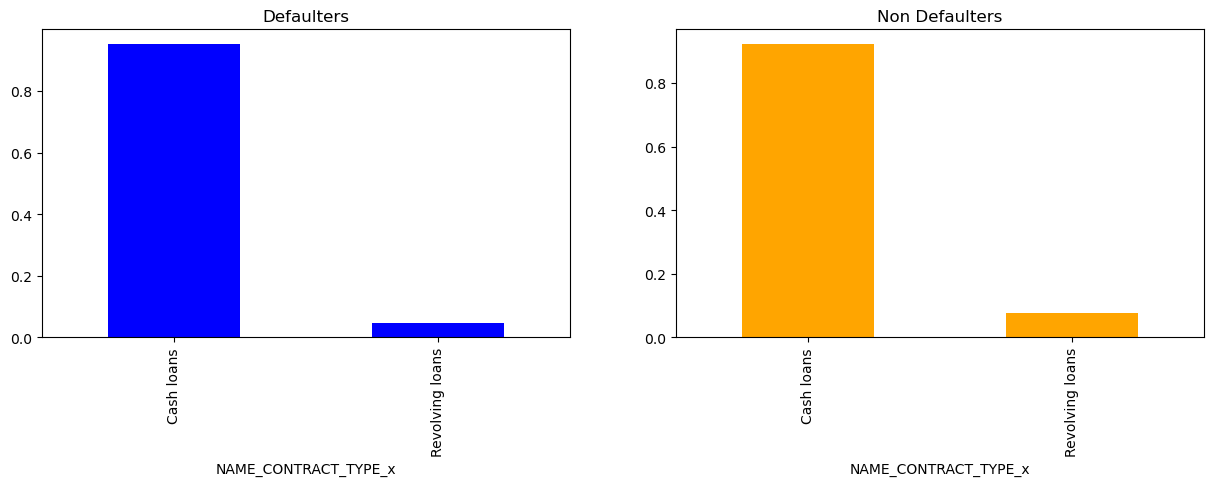

In [145]:
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
plt.title('Defaulters')
plt.xticks(rotation=90)
inp3.NAME_CONTRACT_TYPE_x.value_counts(normalize=True).plot.bar(color='blue')

plt.subplot(1,2,2)
plt.title('Non Defaulters')
plt.xticks(rotation=90)
inp4.NAME_CONTRACT_TYPE_x.value_counts(normalize=True).plot.bar(color='orange')

-  The graphs indicate that mostly cash loans are given to the people in defaulter and non defaulter category

In [146]:
# Find columns whose data types have changed from inp2 to inp3 or inp4
changed_columns_3 = []
changed_columns_4 = []

for col in inp2.columns:
    if inp2[col].dtype != inp3[col].dtype:
        changed_columns_3.append(col)
    if inp2[col].dtype != inp4[col].dtype:
        changed_columns_4.append(col)

print("Columns with changed data types in inp3:", changed_columns_3)
print("Columns with changed data types in inp4:", changed_columns_4)

Columns with changed data types in inp3: []
Columns with changed data types in inp4: []


-  only one column converted itself

##### QUESTION:1
- HOW THIS "CODE_GENDER" COLUMN WAS CONVERTED FROM OBJECT TO INT32 

In [147]:
#change data from integer to categorical
inp3['CODE_GENDER'] = inp3['CODE_GENDER'].astype('object')
inp4['CODE_GENDER'] = inp4['CODE_GENDER'].astype('object')

##### TARGET vs CODE_GENDER

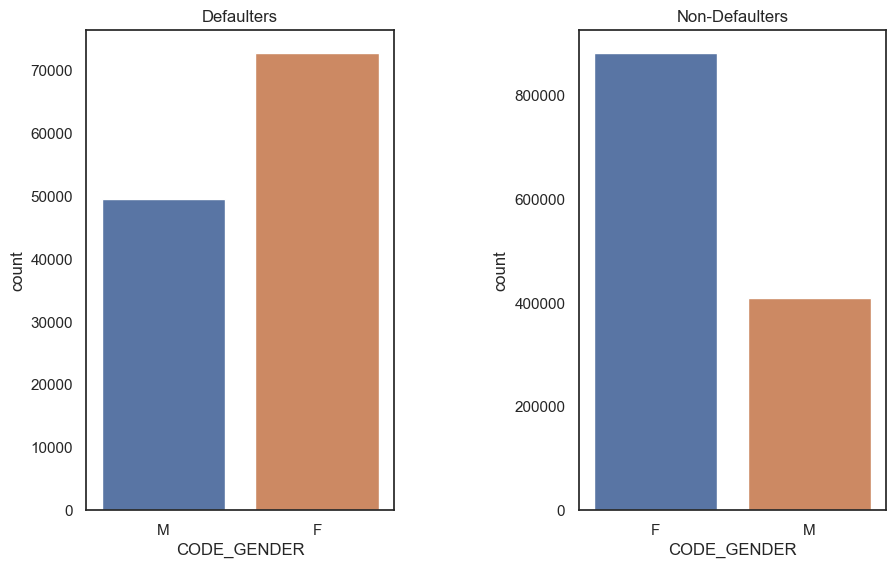

In [193]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
plt.title('Defaulters')
sns.countplot(x=inp3.CODE_GENDER)

plt.subplot(1,2,2)
plt.title('Non-Defaulters')
sns.countplot(x=inp4.CODE_GENDER)
plt.subplots_adjust(left=0.1,bottom=0.1,right=0.9,top=0.9,wspace=0.6,hspace=1.4)
plt.savefig('TARGET vs CODE_GENDER.jpg')

In [149]:
inp3.CODE_GENDER.value_counts()

CODE_GENDER
F    72836
M    49524
Name: count, dtype: int64

In [150]:
inp4.CODE_GENDER.value_counts()

CODE_GENDER
F    882358
M    408983
Name: count, dtype: int64

-  The barplot illustrates that there are approximately 72,836 female defaulters and 882,358 female non-defaulters, while the count for male defaulters is around 49,524 and for male non-defaulters is approximately 408,983.
-  
Thus, the overall data suggests that males exhibit a higher propensity for loan default compared to females.



##### TARGET vs AMT_INCOME_TOTAL

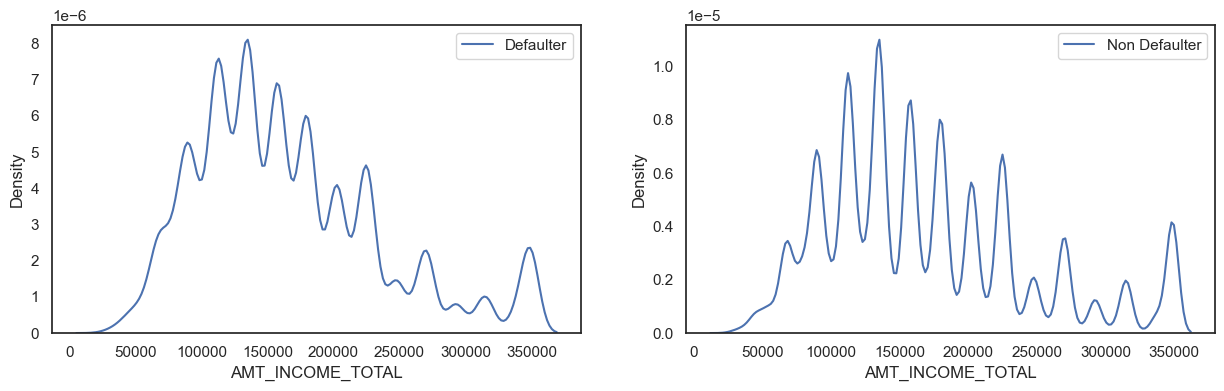

<Figure size 640x480 with 0 Axes>

In [194]:
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
sns.distplot(inp3.AMT_INCOME_TOTAL,label='Defaulter',hist=False)
plt.legend()

plt.subplot(1,2,2)
sns.distplot(inp4.AMT_INCOME_TOTAL,label='Non Defaulter',hist=False)
plt.legend()
plt.show()
plt.savefig('TARGET vs AMT_INCOME_TOTAL.jpg')

-  The analysis reveals that a significant portion of defaulters falls within the income range of 1.2 to 1.7 lakhs. As income increases to 3 and 3.5 lakhs, the number of defaulters declines. Conversely, among non-defaulters, there is a diverse trend. Individuals across both high and low income groups are observed to be non-defaulters.

##### TARGET vs AMT_CREDIT_x

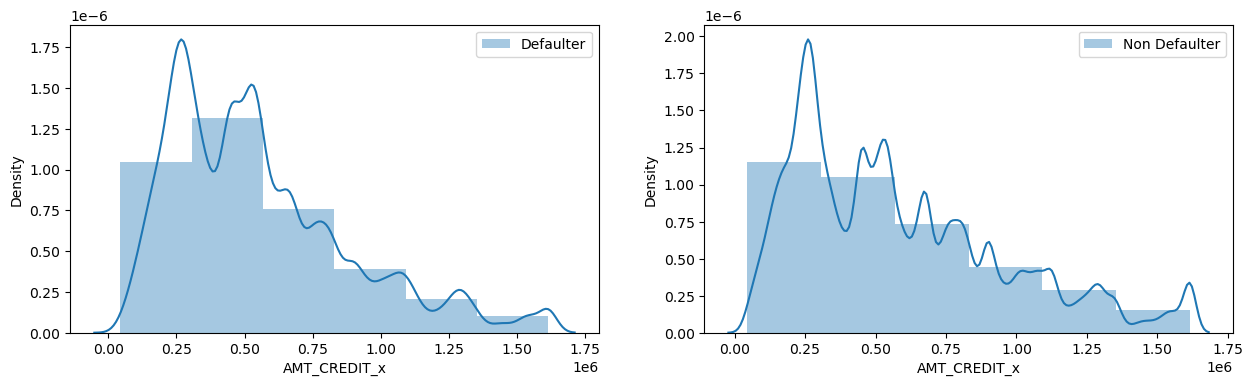

In [152]:
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
sns.distplot(inp3.AMT_CREDIT_x,label='Defaulter',bins=6)
plt.legend()

plt.subplot(1,2,2)
sns.distplot(inp4.AMT_CREDIT_x,label='Non Defaulter',bins=6)
plt.legend()
plt.show()

-  For defaulters, credit values exhibit prominent peaks at 250000 and 500000. In contrast, non-defaulters also have peaks at 250000 and 500000, but they show a more varied pattern with additional peaks observed at 750000, 1250000, and beyond. However, the density gradually decreases after 500000, indicating a diminishing frequency of credit values as they increase.




##### TARGET vs AMT_ANNUITY_x

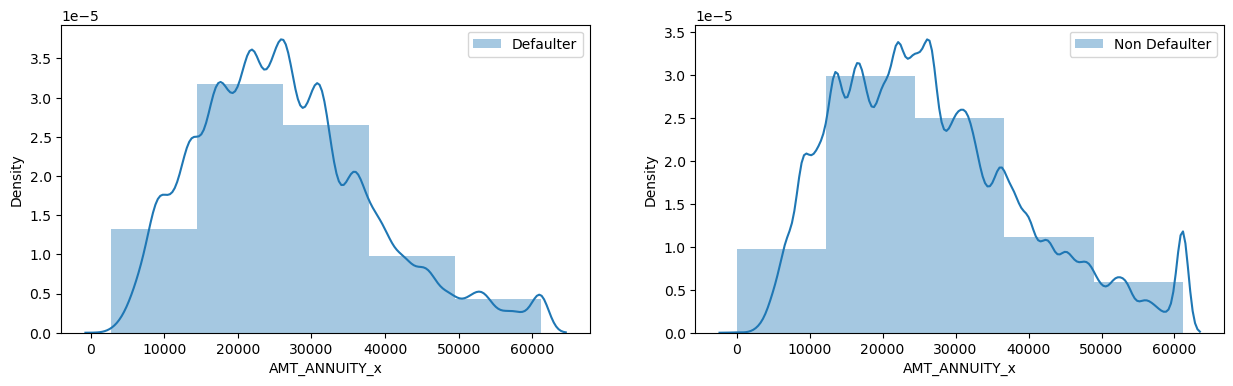

In [153]:
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
sns.distplot(inp3.AMT_ANNUITY_x,label='Defaulter',bins=5)
plt.legend()

plt.subplot(1,2,2)
sns.distplot(inp4.AMT_ANNUITY_x,label='Non Defaulter',bins=5)
plt.legend()
plt.show()

-  
The annuity graph reveals a notable trend: defaulters tend to have annuity values predominantly concentrated between 15000 and 25000, with a gradual decline as annuity values increase. Conversely, for non-defaulters, there's a prominent density peak between annuity values of 15000 and 28000, indicating that individuals within this annuity range are more likely to be non-defaulters.

##### TARGET vs AMT_GOODS_PRICE_x

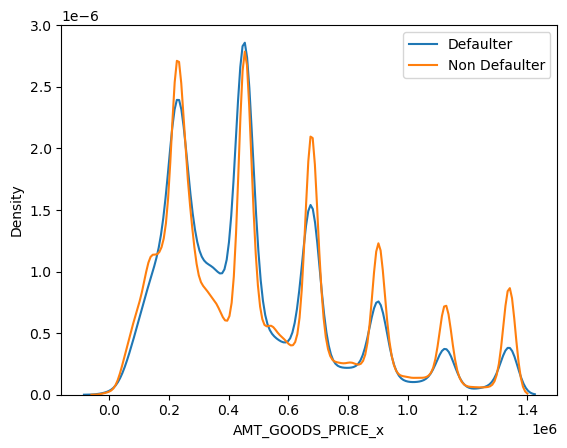

In [154]:
sns.distplot(inp3.AMT_GOODS_PRICE_x,label='Defaulter',hist=False)
sns.distplot(inp4.AMT_GOODS_PRICE_x,label='Non Defaulter',hist=False)
plt.legend()
plt.show()

-   Both defaulters and non-defaulters exhibit a similar trend when analyzed based on the price of goods.

##### Target vs Income Type

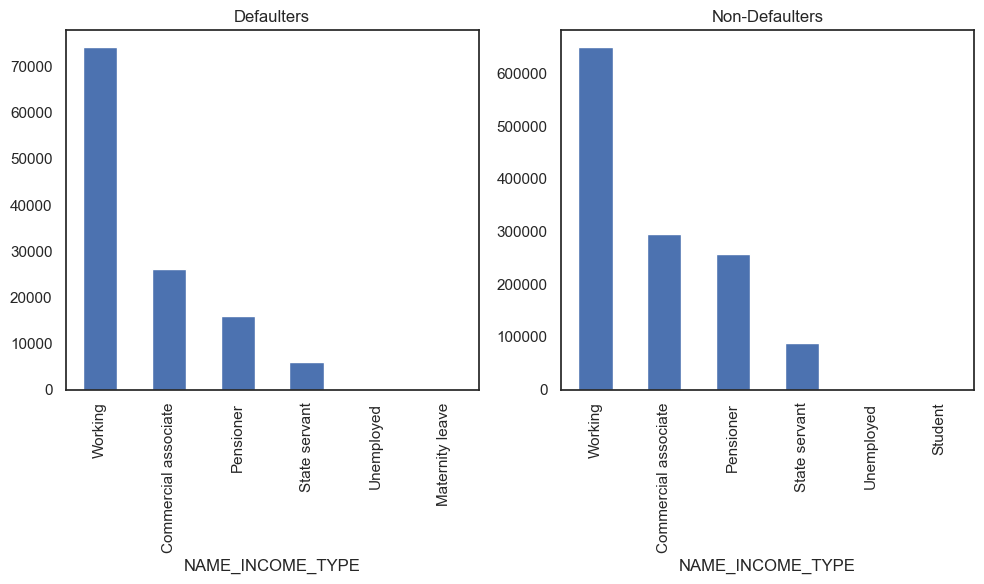

<Figure size 640x480 with 0 Axes>

In [191]:
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.title('Defaulters')
plt.xticks(rotation=90)
inp3['NAME_INCOME_TYPE'].value_counts().plot(kind='bar')

plt.subplot(1, 2, 2)
plt.title('Non-Defaulters')
plt.xticks(rotation=90)
inp4['NAME_INCOME_TYPE'].value_counts().plot(kind='bar')
plt.tight_layout()
plt.show()
plt.savefig('Target vs Income Type.jpg')

-  
The plots reveal that the majority of both defaulters and non-defaulters belong to the working class category.Iit suggests that a significant portion of loan applicants are employed individuals.

##### TARGET vs EDUCATION TYPE

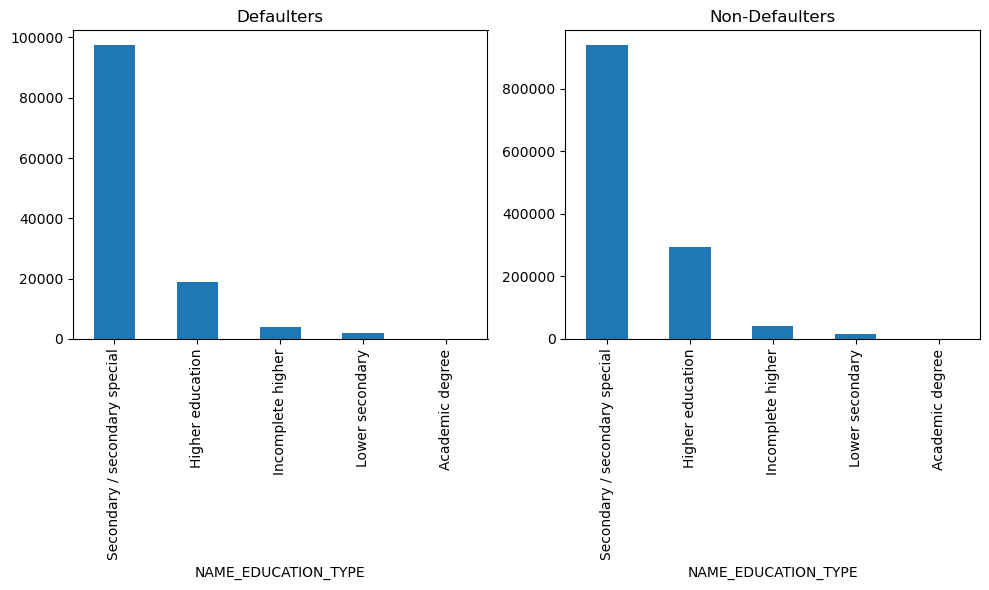

In [156]:
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.title('Defaulters')
plt.xticks(rotation=90)
inp3['NAME_EDUCATION_TYPE'].value_counts().plot(kind='bar')

plt.subplot(1, 2, 2)
plt.title('Non-Defaulters')
plt.xticks(rotation=90)
inp4['NAME_EDUCATION_TYPE'].value_counts().plot(kind='bar')
plt.tight_layout()
plt.show()

In [157]:
inp3.NAME_EDUCATION_TYPE.value_counts(normalize=True)

NAME_EDUCATION_TYPE
Secondary / secondary special    0.796813
Higher education                 0.154650
Incomplete higher                0.033197
Lower secondary                  0.015258
Academic degree                  0.000082
Name: proportion, dtype: float64

In [158]:
inp4.NAME_EDUCATION_TYPE.value_counts(normalize=True)

NAME_EDUCATION_TYPE
Secondary / secondary special    0.728238
Higher education                 0.227610
Incomplete higher                0.031865
Lower secondary                  0.011846
Academic degree                  0.000441
Name: proportion, dtype: float64

-  It has been observed that the maximum defaulters are in education category of Secondary/Secondary Special which account to 79% of the total defaulters. This is the indication that people who have education till secondary level earn less or have low source of income and are not able to pay the loans on time.
-  Similarly, non-defaulters also predominantly fall into the education category of Secondary/Secondary Special, accounting for 72% of the total.

Overall, the analysis indicates a close association between Education Type and loan repayment status, with both defaulters and non-defaulters showing similar distributionpe



##### Target vs Family Status

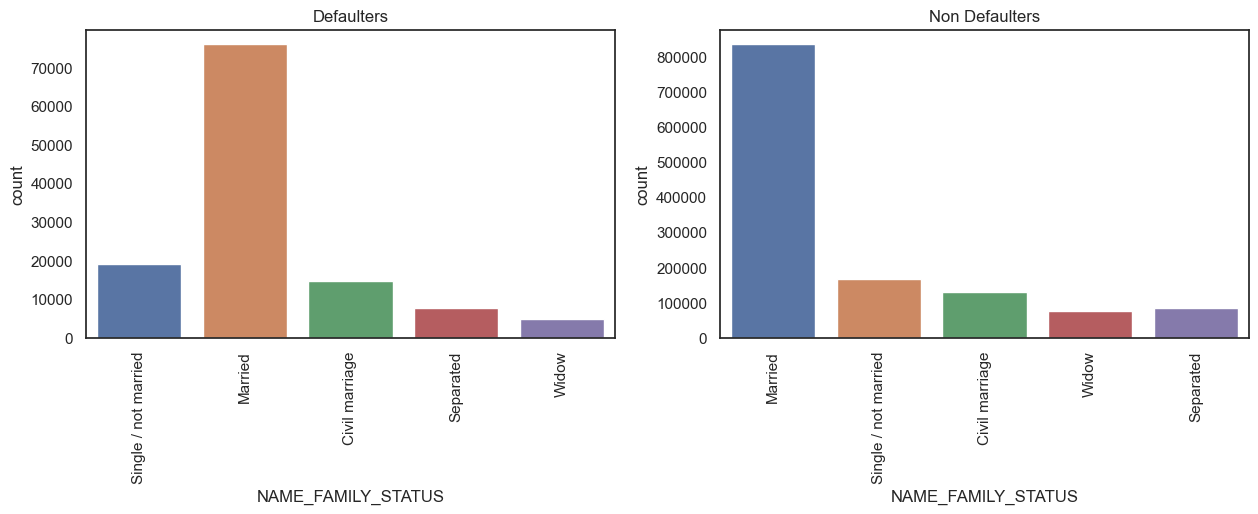

In [195]:
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
plt.title('Defaulters')
plt.xticks(rotation=90)
sns.countplot(x=inp3.NAME_FAMILY_STATUS)

plt.subplot(1,2,2)
plt.title('Non Defaulters')
plt.xticks(rotation=90)
sns.countplot(x=inp4.NAME_FAMILY_STATUS)
plt.savefig('Target vs Family Status.jpg')

-  The graph indicates that most of the defaulters fall in married category. Also, the same is true for the non defaulters as well.

##### Target vs Housing Type

<Axes: title={'center': 'Non Defaulters'}, xlabel='NAME_HOUSING_TYPE'>

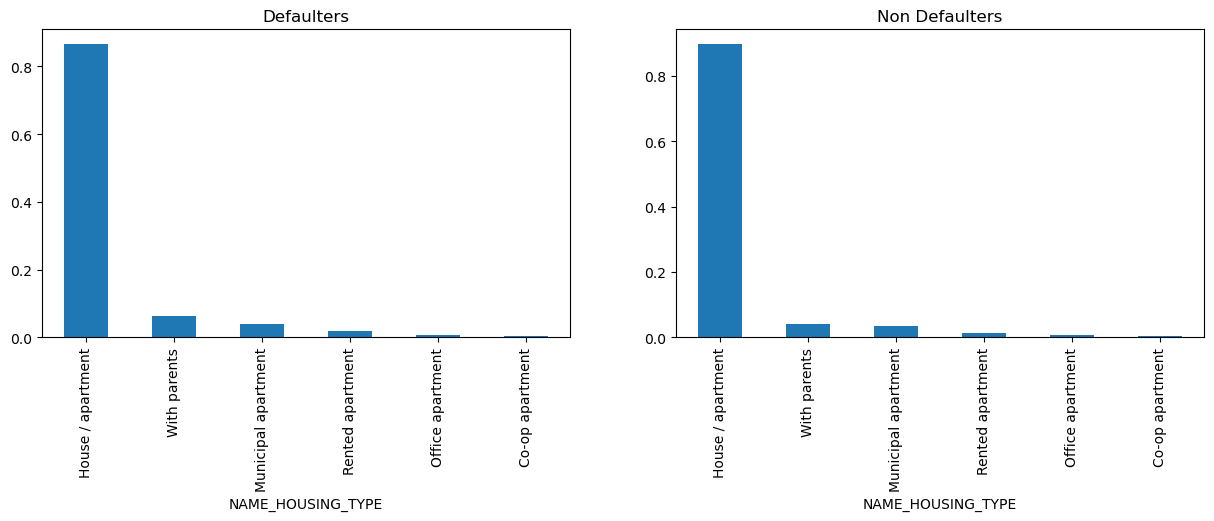

In [160]:
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
plt.title('Defaulters')
plt.xticks(rotation=90)
inp3.NAME_HOUSING_TYPE.value_counts(normalize=True).plot.bar()

plt.subplot(1,2,2)
plt.title('Non Defaulters')
plt.xticks(rotation=90)
inp4.NAME_HOUSING_TYPE.value_counts(normalize=True).plot.bar()

-  The data indicates that maximum people stay in their own house/appratments in both the defaulters and non defaulters category

##### TARGET vs OCCUPATION TYPE

<Axes: title={'center': 'Non Defaulters'}, xlabel='OCCUPATION_TYPE'>

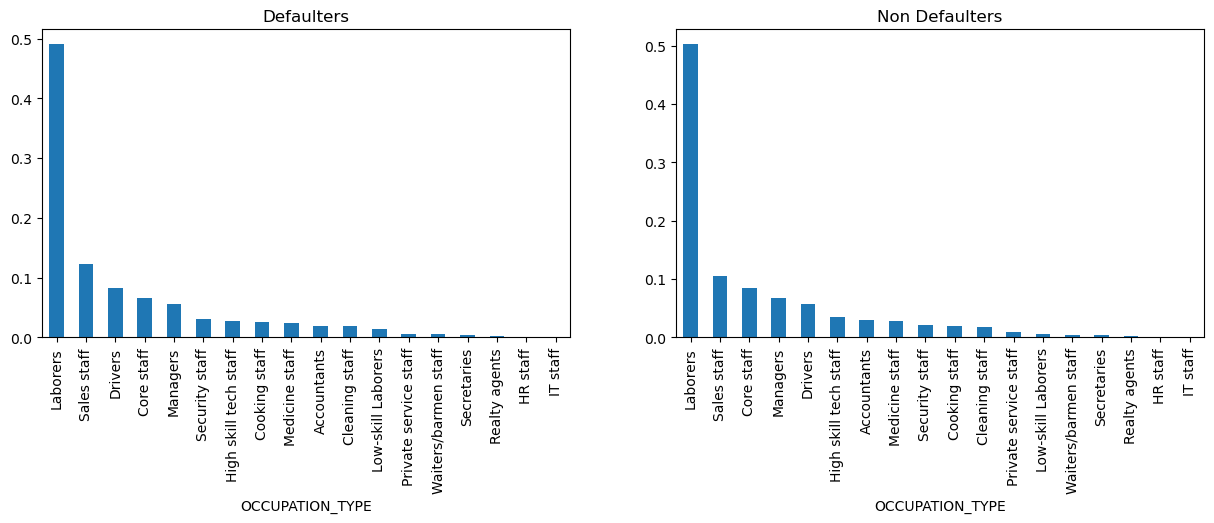

In [161]:
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
plt.title('Defaulters')
plt.xticks(rotation=90)
inp3.OCCUPATION_TYPE.value_counts(normalize=True).plot.bar()

plt.subplot(1,2,2)
plt.title('Non Defaulters')
plt.xticks(rotation=90)
inp4.OCCUPATION_TYPE.value_counts(normalize=True).plot.bar()

-  The plot indicates that the labourers occupation type is more in defaulters and non defalters

##### Target vs AGE

<Axes: title={'center': 'Non Defaulters'}, xlabel='Age', ylabel='count'>

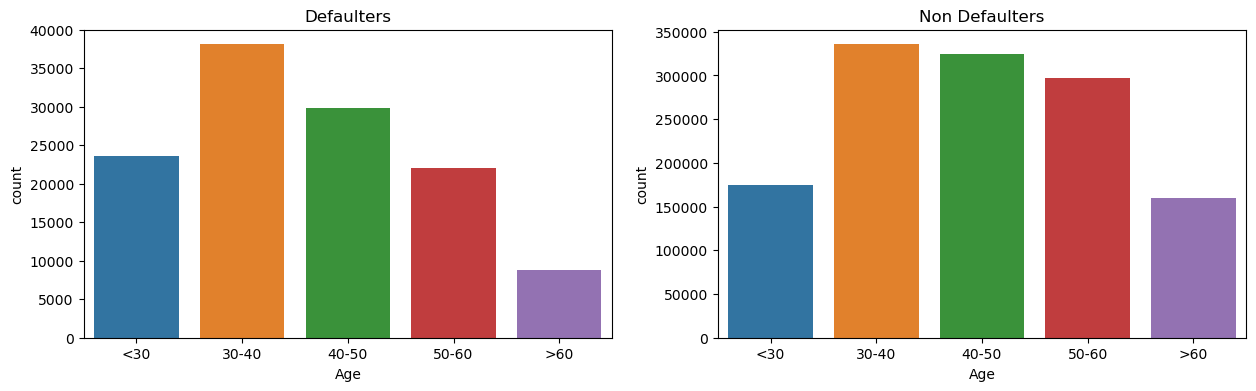

In [162]:
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
plt.title('Defaulters')
sns.countplot(x=inp3.Age)

plt.subplot(1,2,2)
plt.title('Non Defaulters')
sns.countplot(x=inp4.Age)

In [163]:
inp3.Age.value_counts(normalize=True)

Age
30-40    0.311409
40-50    0.243969
<30      0.192514
50-60    0.180598
>60      0.071510
Name: proportion, dtype: float64

In [164]:
inp4.Age.value_counts(normalize=True)

Age
30-40    0.259876
40-50    0.251032
50-60    0.230384
<30      0.134980
>60      0.123728
Name: proportion, dtype: float64

-  Analysis reveals that approximately 31% of defaulters fall within the age bracket of 30-40 years, closely followed by individuals aged 40-50 years. This suggests a higher likelihood of default among individuals in these age groups.
-  Similarly, the majority of non-defaulters are found in the age groups of 30-40 years and 40-50 years.
-  Older individuals exhibit lower representation in the defaulter category, with a similar trend observed in the non-defaulter category. Consequently, it appears that older individuals are a favorable demographic for banks to consider for loan approval.-  
Individuals under the age of 30 years are underrepresented in both defaulters and non-defaulters groups.

##### Target vs Income Category

<Axes: title={'center': 'Non Defaulters'}, xlabel='INCOME_CATEGORY'>

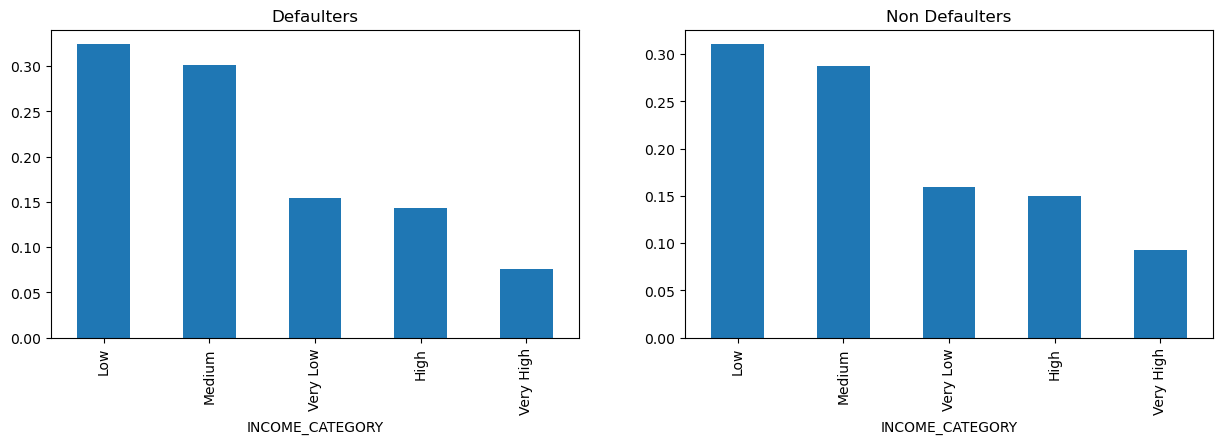

In [165]:
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
plt.title('Defaulters')
plt.xticks(rotation=90)
inp3.INCOME_CATEGORY.value_counts(normalize=True).plot.bar()

plt.subplot(1,2,2)
plt.title('Non Defaulters')
plt.xticks(rotation=90)
inp4.INCOME_CATEGORY.value_counts(normalize=True).plot.bar()

-  
The visualization illustrates a clear correlation between income levels and loan default. Individuals with lower incomes tend to have a higher likelihood of defaulting on loans, mirroring a common real-life scenario where those with modest salaries often rely on loans but struggle to repay them. This trend persists across income categories, with medium, high, very low, and very high income groups following a similar pattern.
- Interestingly, the trend holds true for non-defaulters as well, indicating that income level significantly influences repayment behavior. Overall,
   it underscores the critical role of financial capacity in determining loan repayment outcomes, distinguishing between defaulters and non-defaulters.
.



##### Target vs CREDIT CATEGORY 

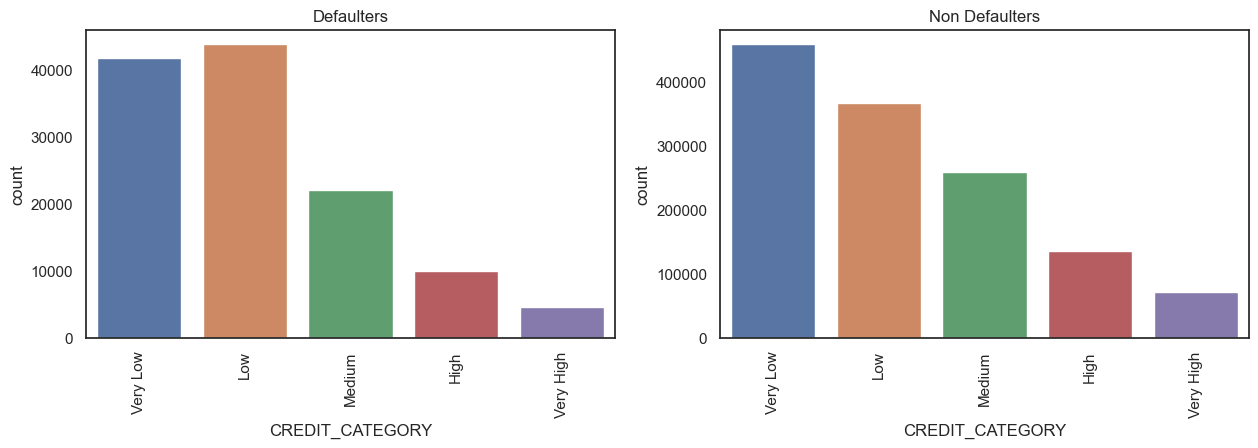

In [192]:
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
plt.title('Defaulters')
plt.xticks(rotation=90)
sns.countplot(x=inp3.CREDIT_CATEGORY)

plt.subplot(1,2,2)
plt.title('Non Defaulters')
plt.xticks(rotation=90)
sns.countplot(x=inp4.CREDIT_CATEGORY)
plt.savefig('Target vs CREDIT CATEGORY.jpg')

-  The graph illustrates that individuals with very low and low credit amounts constitute a significant portion of defaulters. Similarly, the non-defaulters also exhibit a sizable presence among those with very low credit amounts.

### Bivariate Analysis

##### NAME_CONTRACT_TYPE_x vs NAME_CONTRACT_TYPE_y

<Axes: xlabel='NAME_CONTRACT_TYPE_y', ylabel='count'>

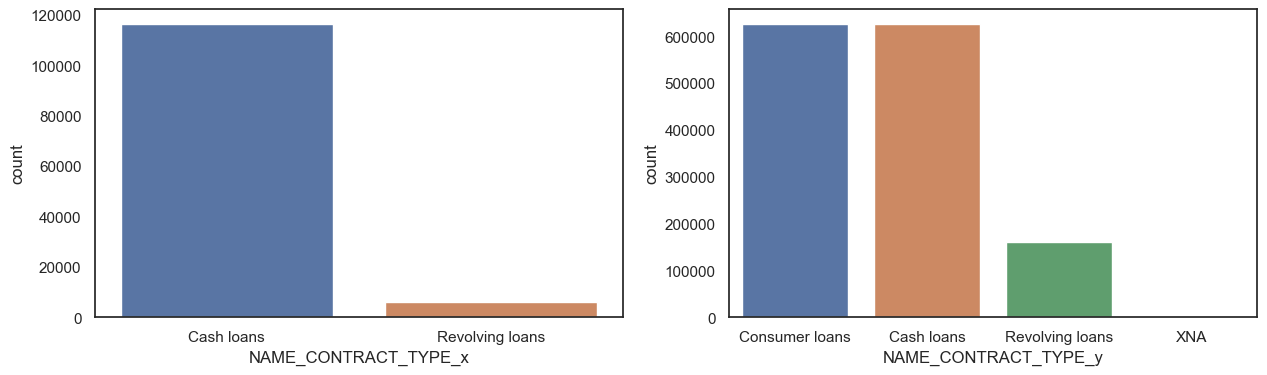

In [167]:
sns.set(style='white')
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
sns.countplot(x=inp3.NAME_CONTRACT_TYPE_x)

plt.subplot(1,2,2)
sns.countplot(x=inp2.NAME_CONTRACT_TYPE_y)

-  The plots indicate that the previous data base has three type of loans: Cash Loans, Revolving Loans and Consumer Loans. But in current application data set, there are only cash loans and revolving loans.
-  The data also indicates that in current applications there are more cash loans that are being provided to the people and in previous data there are more consumer loans that are provided to the people.

##### AMT_INCOME_TOTAL vs AMT_CREDIT_x

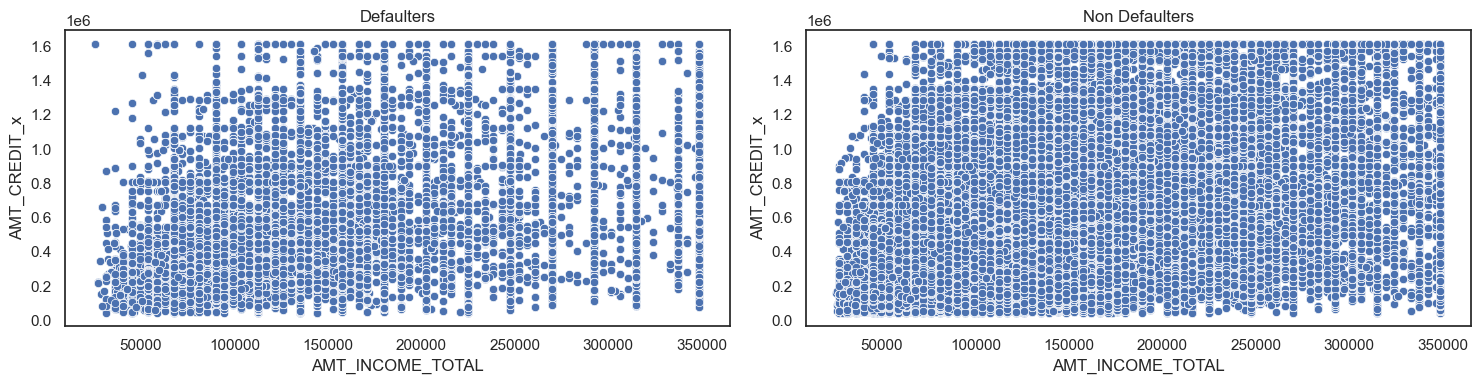

In [168]:
plt.figure(figsize=(15, 4))
plt.subplot(1, 2, 1)
plt.title('Defaulters')
sns.scatterplot(x=inp3.AMT_INCOME_TOTAL, y=inp3.AMT_CREDIT_x)

plt.subplot(1, 2, 2)
plt.title('Non Defaulters')
sns.scatterplot(x=inp4.AMT_INCOME_TOTAL, y=inp4.AMT_CREDIT_x)
plt.tight_layout()
plt.show()

In [169]:
print ("Correlation b/w Income and Credit for defaulters",inp3.AMT_INCOME_TOTAL.corr(inp3.AMT_CREDIT_x))
print ("Correlation b/w Income and Credit for non defaulters",inp4.AMT_INCOME_TOTAL.corr(inp4.AMT_CREDIT_x))

Correlation b/w Income and Credit for defaulters 0.3171344301523094
Correlation b/w Income and Credit for non defaulters 0.38856798384532826


-  This scatter plot visually demonstrates the relationship between two variables.
-  The data for defaulters suggests a positive correlation between income and credit, albeit not a strong linear relationship.
-  The scatter plot for non-defaulters similarly illustrates that there is no linear relationship between income and credit.
-  Typically, a person with higher income tends to receive a higher credit limit, while those with lower income receive lower credit limits. However, this dataset does not exhibit such a clear relationship.

##### CODE_GENDER vs NAME_CONTRACT_TYPE_x

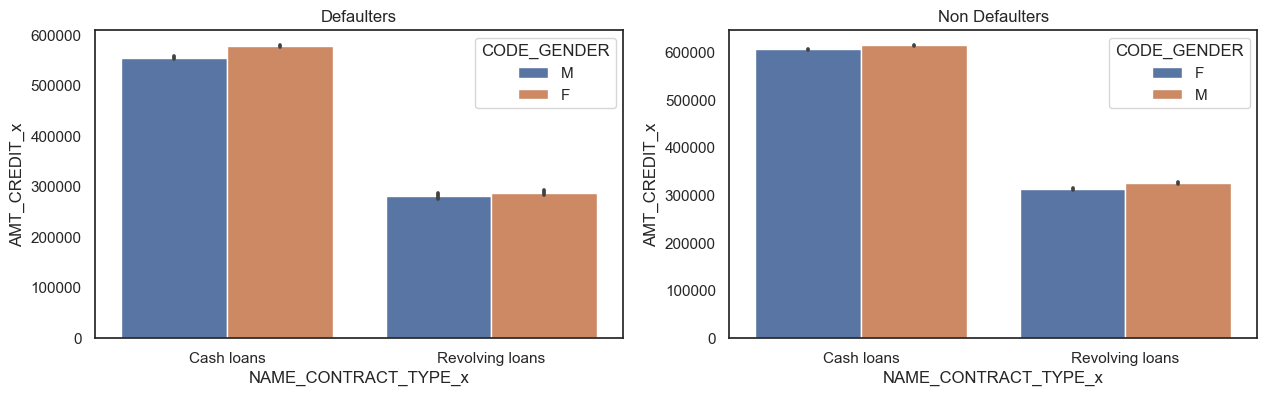

In [170]:
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
plt.title('Defaulters')
sns.barplot(x=inp2.NAME_CONTRACT_TYPE_x,y=inp3.AMT_CREDIT_x,hue=inp3.CODE_GENDER)

plt.subplot(1,2,2)
plt.title('Non Defaulters')
sns.barplot(x=inp2.NAME_CONTRACT_TYPE_x,y=inp4.AMT_CREDIT_x,hue=inp4.CODE_GENDER)

plt.show()

-  The graph distinctly shows that among defaulters, there is a higher prevalence of cash loans among females compared to males. Conversely, revolving loans are more commonly extended to males than females.
-  Among non-defaulters, there is a trend where cash loans and revolving loans are predominantly availed by males, with fewer females accessing these types of loans.
-  Therefore, it can be inferred that banks may find males more reliable when extending cash loans and revolving loans, considering their lower default rates among non-defaulters. Conversely, when dealing with defaulters, banks should exercise caution when granting cash loans to females and when providing revolving loans to males.

##### OCCUPATION TYPE vs CREDIT

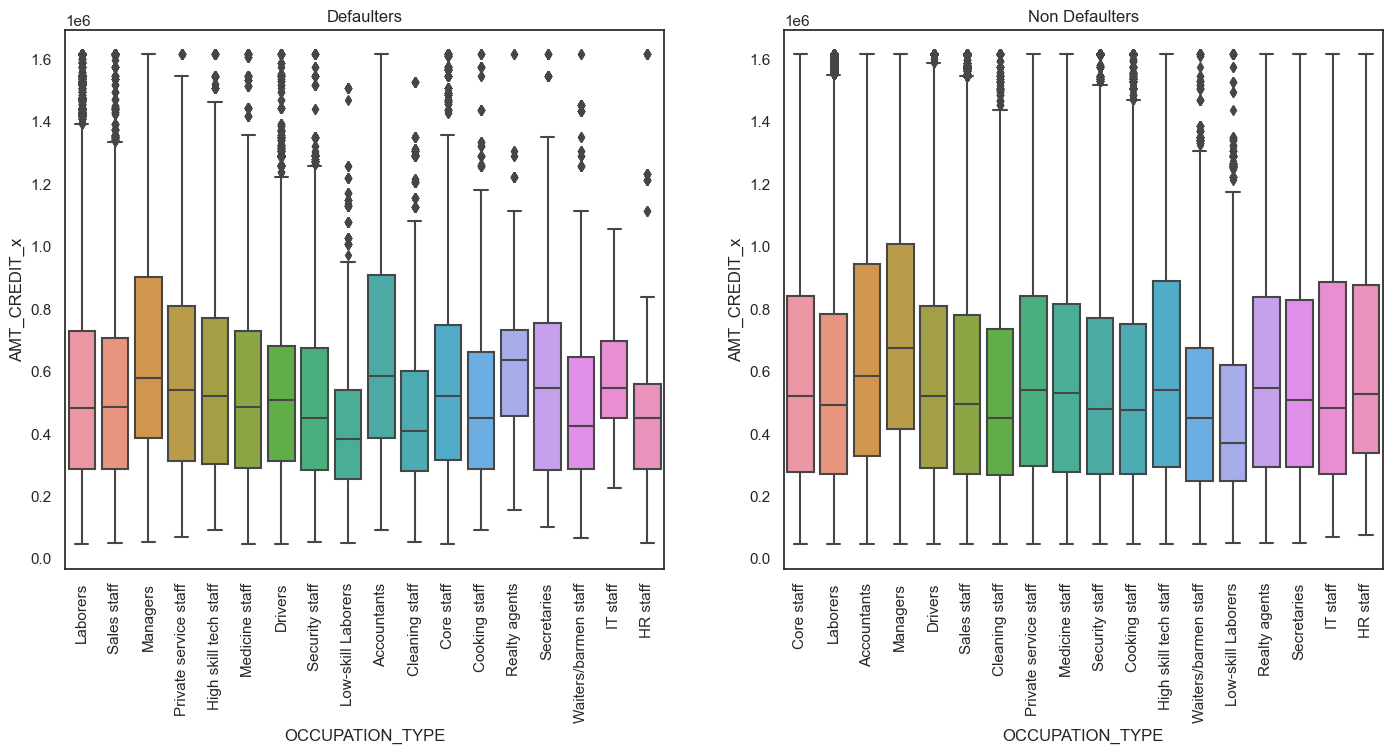

In [171]:
plt.figure(figsize=(17,7))
plt.subplot(1,2,1)
plt.title('Defaulters')
sns.boxplot(x=inp3.OCCUPATION_TYPE, y=inp3.AMT_CREDIT_x)
plt.xticks(rotation=90)

plt.subplot(1,2,2)
plt.title('Non Defaulters')
sns.boxplot(x=inp4.OCCUPATION_TYPE, y=inp4.AMT_CREDIT_x)
plt.xticks(rotation=90)
plt.show()

-  
In the defaulters group, it's notable that both Accountants and Managers tend to have higher credit amounts and are more prone to loan defaults. This suggests that banks and financial institutions should exercise greater caution and scrutiny when assessing the assets and repayment capacity of individuals in managerial and accounting positions before extending loans to them
-  In the same manner the next category of occupation that has more credit amount is Private service staff, high skill service staff followed by HR Staff, secretaries and drivers. As per analysis these categories tend to default the loan payment. So banks need to be careful for them
-  The remaining categories are also defaulters but have less loan amounts with the.m
-  Non Defaulters, It is evident that managers and accountants are the ones who have taken maximum loans and have paid the loans on time.
- In summary, Banks must be extra cautious when evaluating loan requests from individuals holding managerial and accounting positions.


.

##### AMT_ANNUITY_x vs AMT_INCOME_TOTAL

<Axes: title={'center': 'Non Defaulter'}, xlabel='AMT_ANNUITY_x', ylabel='AMT_INCOME_TOTAL'>

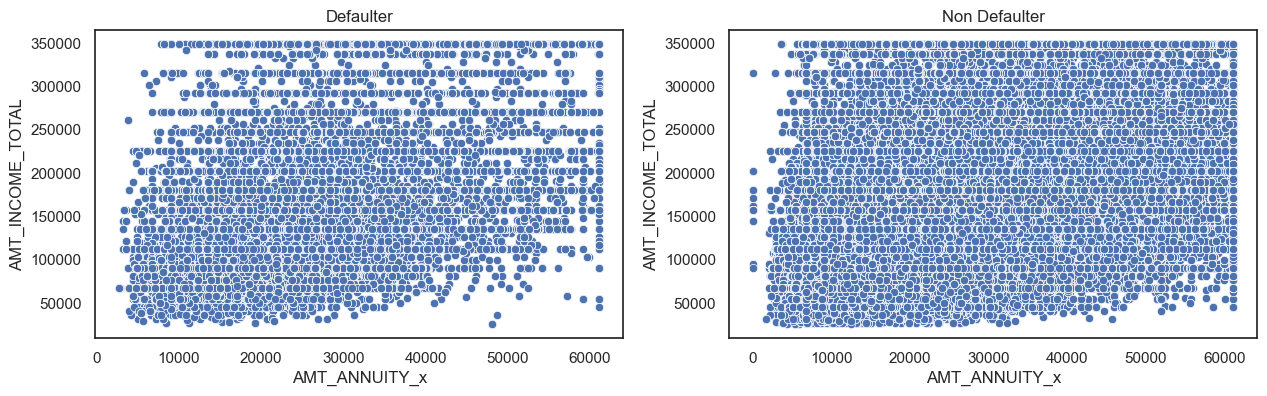

In [172]:
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
plt.title('Defaulter')
sns.scatterplot(x=inp3.AMT_ANNUITY_x,y=inp3.AMT_INCOME_TOTAL)

plt.subplot(1,2,2)
plt.title('Non Defaulter')
sns.scatterplot(x=inp4.AMT_ANNUITY_x,y=inp4.AMT_INCOME_TOTAL)

In [173]:
print ("Correlation b/w Income and Annuity for defaulters",inp3.AMT_INCOME_TOTAL.corr(inp3.AMT_ANNUITY_x))
print ("Correlation b/w Income and Annuity for non defaulters",inp4.AMT_INCOME_TOTAL.corr(inp4.AMT_ANNUITY_x))

Correlation b/w Income and Annuity for defaulters 0.40664549904852326
Correlation b/w Income and Annuity for non defaulters 0.47207305166980335


This scatter plot basically provides us how the two variables are realted to each other. 
-  The Defauters data indicate that, the corelation between the income and annuity is not that great. It is a positive correlation but here is no linear relation between them.
-  The non defaulters scatter plot also indicates that there is no linear relation between Income and Anuuity.

##### AGE vs AMT_CREDIT_x

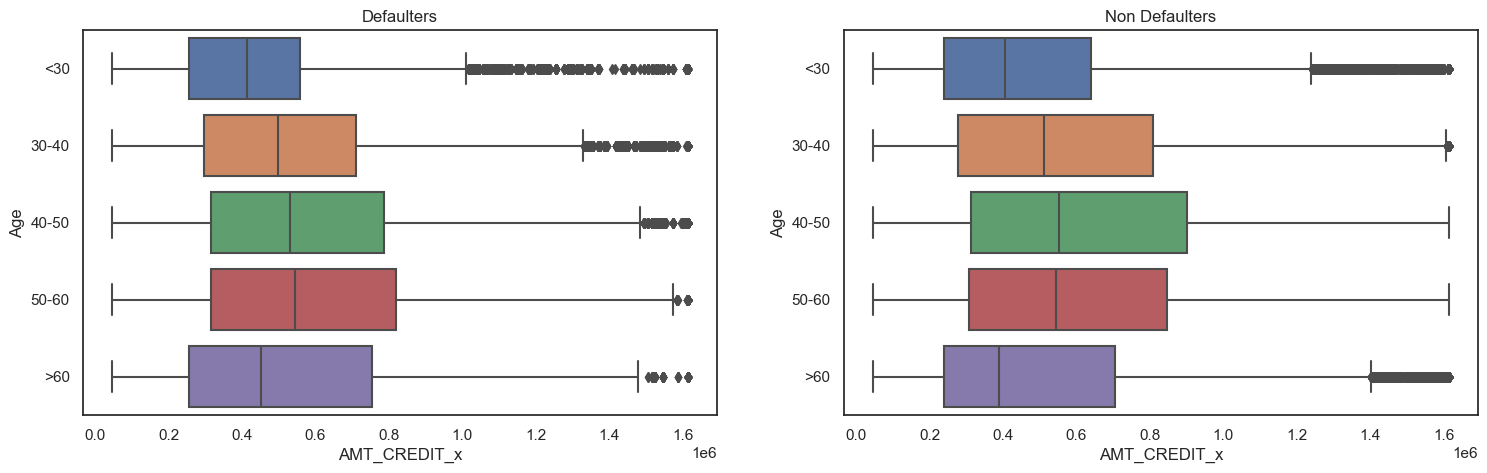

In [174]:
plt.figure(figsize=(18,5))
plt.subplot(1,2,1)
plt.title('Defaulters')
sns.boxplot(x=inp3.AMT_CREDIT_x,y=inp3.Age)

plt.subplot(1,2,2)
plt.title('Non Defaulters')
sns.boxplot(x=inp4.AMT_CREDIT_x,y=inp4.Age)
plt.show()

-  Among defaulters, individuals aged 40-50 and 50-60 tend to have the highest credit amounts, followed by those over 60 years old, and then by those aged 30-40.
-  Defaulters who are younger than 30 years old typically have lower credit amounts.-  
In the non-defaulters category, middle-aged individuals (40-50 years old) are the most frequent borrowers, followed by older individuals (50 years and above), and then by young adults (30-40 years old
-  Based on the non-defaulters' data, it is advisable for banks to consider lending to individuals younger than 30 years old, as they demonstrate responsible repayment behavior. Additionally, older individuals (over 60 years old) can be regarded as reliable borrowers, as they tend to have sufficient savings to repay loans.
-  now have a look more on the income and credit data for more understanding.).

##### income category vs Credit_x

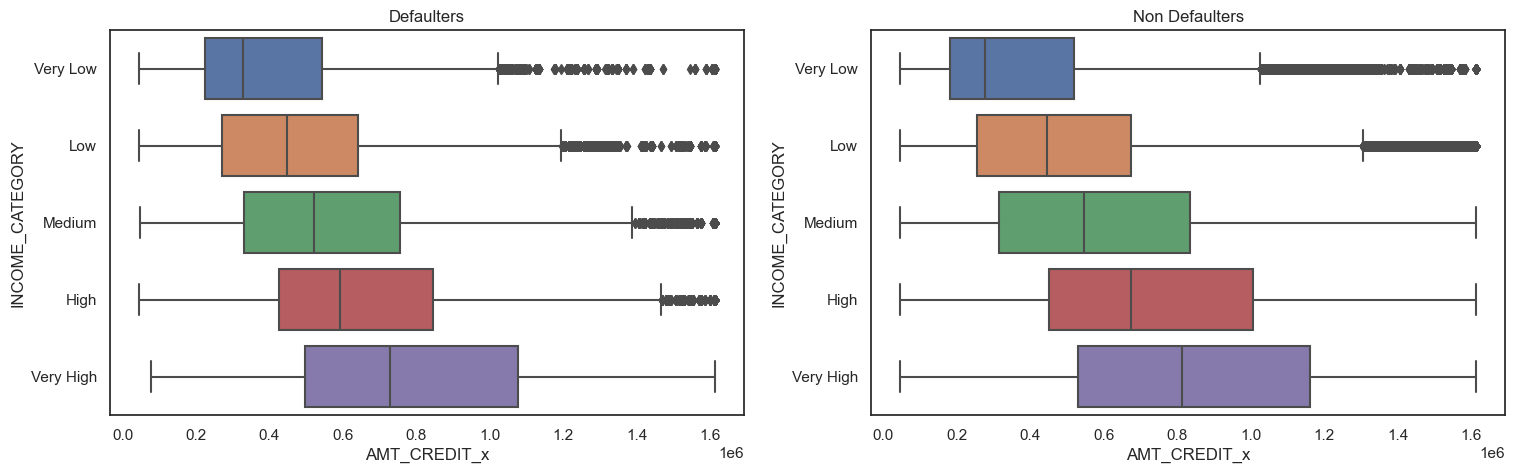

In [175]:
plt.figure(figsize=(18,5))
plt.subplot(1,2,1)
plt.title('Defaulters')
sns.boxplot(x=inp3.AMT_CREDIT_x,y=inp3.INCOME_CATEGORY)

plt.subplot(1,2,2)
plt.title('Non Defaulters')
sns.boxplot(x=inp4.AMT_CREDIT_x,y=inp4.INCOME_CATEGORY)
plt.show()

-  Among defaulters, individuals with higher incomes tend to have higher credit amounts, while those with lower incomes typically have lower credit amounts. This relationship is evident from the median values in the defaulter's distribution, indicating that as the income of defaulters increases, so does the credit amount provided to them.
-  The same pattern is observed among non-defaulters, where individuals with higher incomes receive higher credit amounts. However, the distinction lies in the fact that non-defaulters with high and very high incomes are granted even larger credit amounts, reaching up to 13 lakhs, compared to their counterparts in the defaulters category, who receive around 11 lakhs.




##### Annuity_x vs Income Type

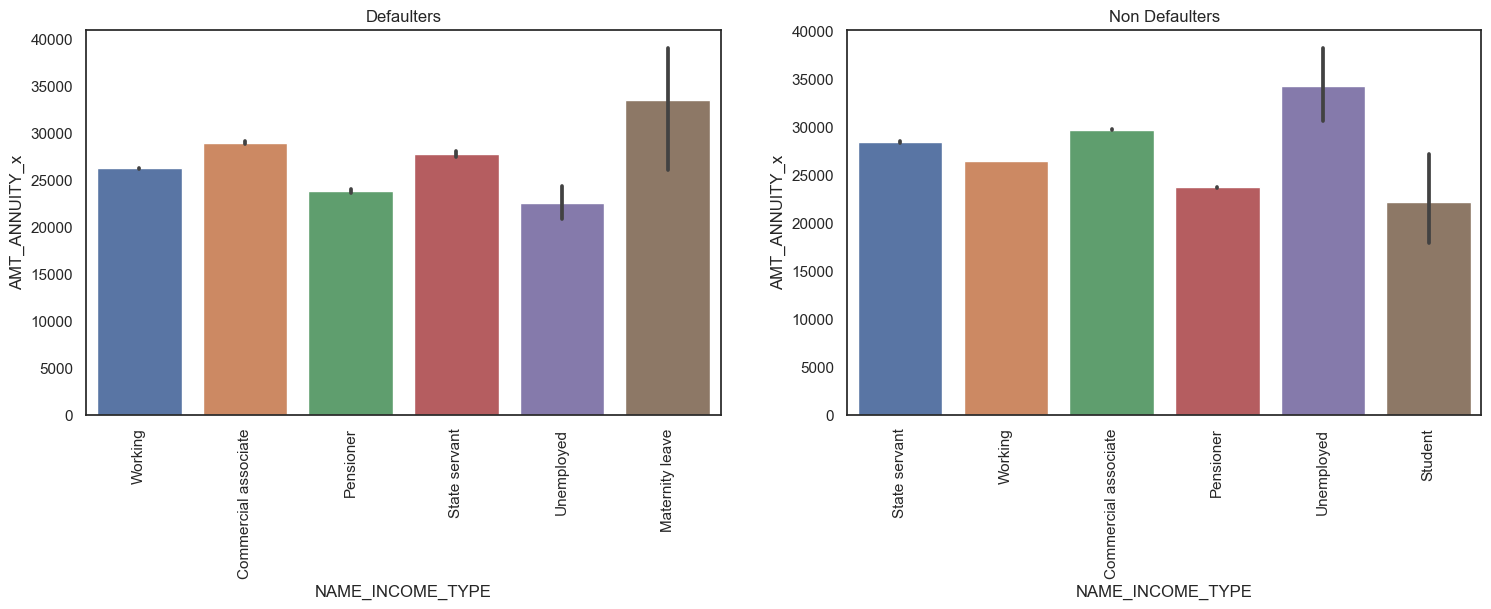

<Figure size 640x480 with 0 Axes>

In [203]:
plt.figure(figsize=(18,5))
plt.subplot(1,2,1)
plt.title('Defaulters')
sns.barplot(x=inp3.NAME_INCOME_TYPE,y=inp3.AMT_ANNUITY_x)
plt.xticks(rotation=90)

plt.subplot(1,2,2)
plt.title('Non Defaulters')
sns.barplot(x=inp4.NAME_INCOME_TYPE,y=inp4.AMT_ANNUITY_x)
plt.xticks(rotation=90)
plt.show()
plt.savefig('Annuity_x vs Income Type.jpg')

-  Commercial associates and state servants, along with individuals on maternity leave, exhibit similar annuity amounts. These three groups display relatively high annuity assets, with values around 35000, a median of 25000, and a lower quartile value around 20000.
-  On the other hand, unemployed individuals tend to have the lowest annuity amounts, although their median value falls between 20000 to 25000. Pensioners, representing older individuals in the income category, generally have higher annuity amounts compared to the unemployed. However, in the defaulters category, pensioners and unemployed individuals share the same median annuity value.
-  non-defaulters
-  both commercial servants and unemployed non-defaulters share a median annuity value of approximately 28500. However, unemployed non-defaulters possess a higher annuity amount, around 35000, suggesting they have substantial savings and investments compared to commercial servants.
-  Similarly, working-class individuals and students have the same median annuity value, but working individuals tend to have higher annuity amounts than students. This discrepancy can be attributed to the fact that working individuals typically earn more income compared to students, who often rely on pocket money or income from internships. Therefore, non-defaulting working individuals tend to have higher annuity values.


##### NAME_INCOME_TYPE and AMT_INCOME_TOTAL

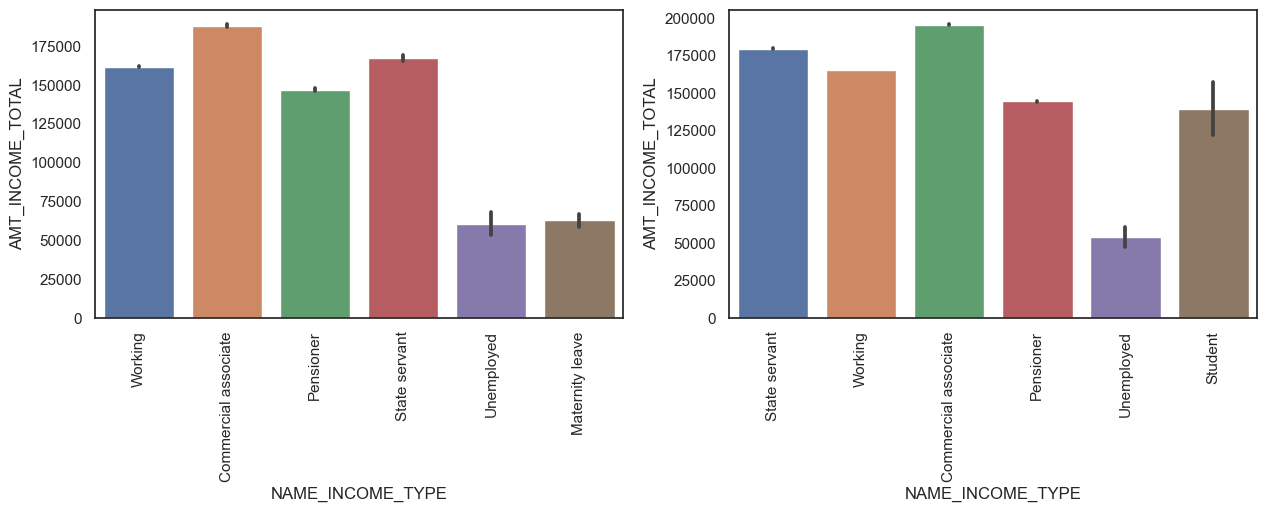

<Figure size 640x480 with 0 Axes>

In [201]:
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
sns.barplot(x=inp3.NAME_INCOME_TYPE,y=inp3.AMT_INCOME_TOTAL)
plt.xticks(rotation=90)

plt.subplot(1,2,2)
sns.barplot(x=inp4.NAME_INCOME_TYPE,y=inp4.AMT_INCOME_TOTAL)
plt.xticks(rotation=90)
plt.show()

Insights from the analysis reveal the following:
-    Defaulters show a diverse income distribution, with Commercial associates occupying the highest income bracket, followed by state servants, the working class, pensioners, and the unemployed.
-    Conversely, among non-defaulters, businessmen exhibit the highest income bracket, followed by individuals on maternity leave, Commercial associates, state servants, the working class, students, the unemployed, and pensioners.
An intriguing observation emerges from the analysis: defaulters do not include businessmen and students, both of whom also appear among non-defaulters. This suggests that both businessmen and students may be considered trustworthy candidates by banks when assessing loan applications.

##### NAME_INCOME_TYPE and AMT_CREDIT_x

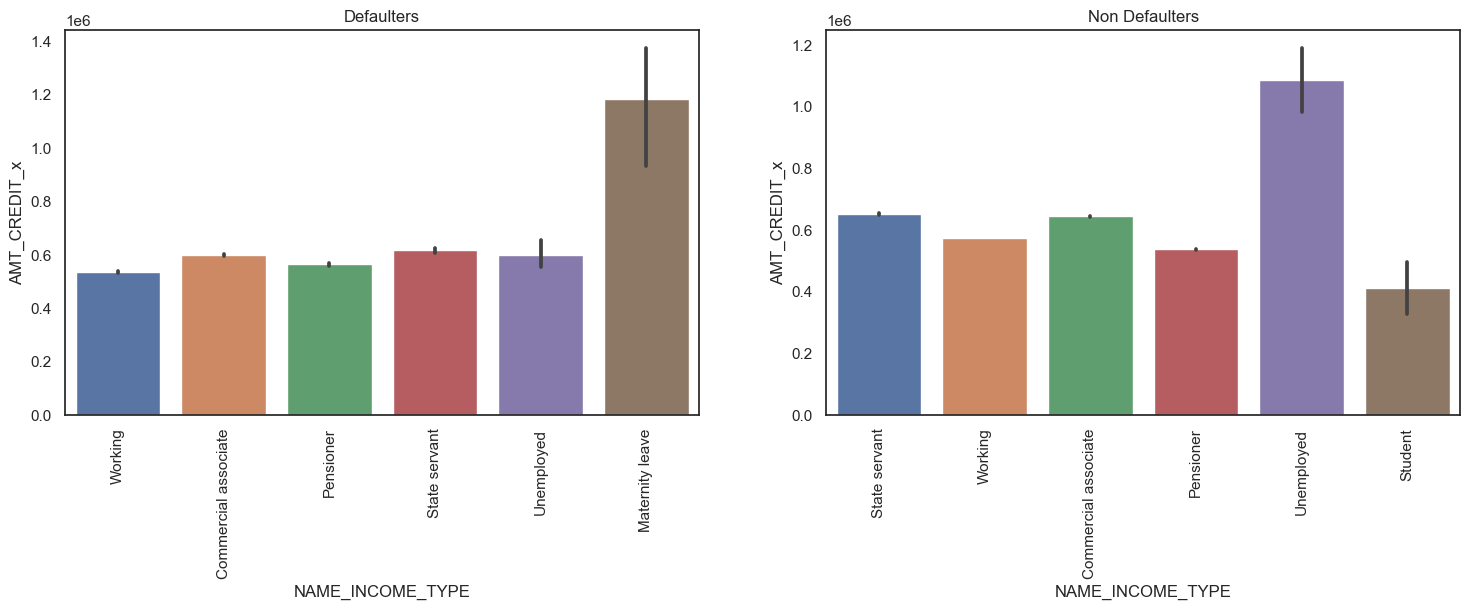

<Figure size 640x480 with 0 Axes>

In [200]:
plt.figure(figsize=(18,5))
plt.subplot(1,2,1)
plt.title('Defaulters')
sns.barplot(x=inp3.NAME_INCOME_TYPE,y=inp3.AMT_CREDIT_x)
plt.xticks(rotation=90)

plt.subplot(1,2,2)
plt.title('Non Defaulters')
sns.barplot(x=inp4.NAME_INCOME_TYPE,y=inp4.AMT_CREDIT_x)
plt.xticks(rotation=90)
plt.show()

-   Among defaulters, individuals on maternity leave tend to have higher credit amounts, whereas commercial associates and state servants exhibit moderate credit values. Conversely, the working population and Unemployed demonstrates lower credit amounts within the defaulters category.
-   Among non-defaulters, businessmen exhibit a notable trend with significant credit amounts, followed by unemployed individuals, who, despite their need for loans, consistently fulfill their repayment obligations. Similar credit patterns are observed among state servants and commercial associates, as well as working individuals..




##### AMT_CREDIT_x vs NAME_FAMILY_STATUS

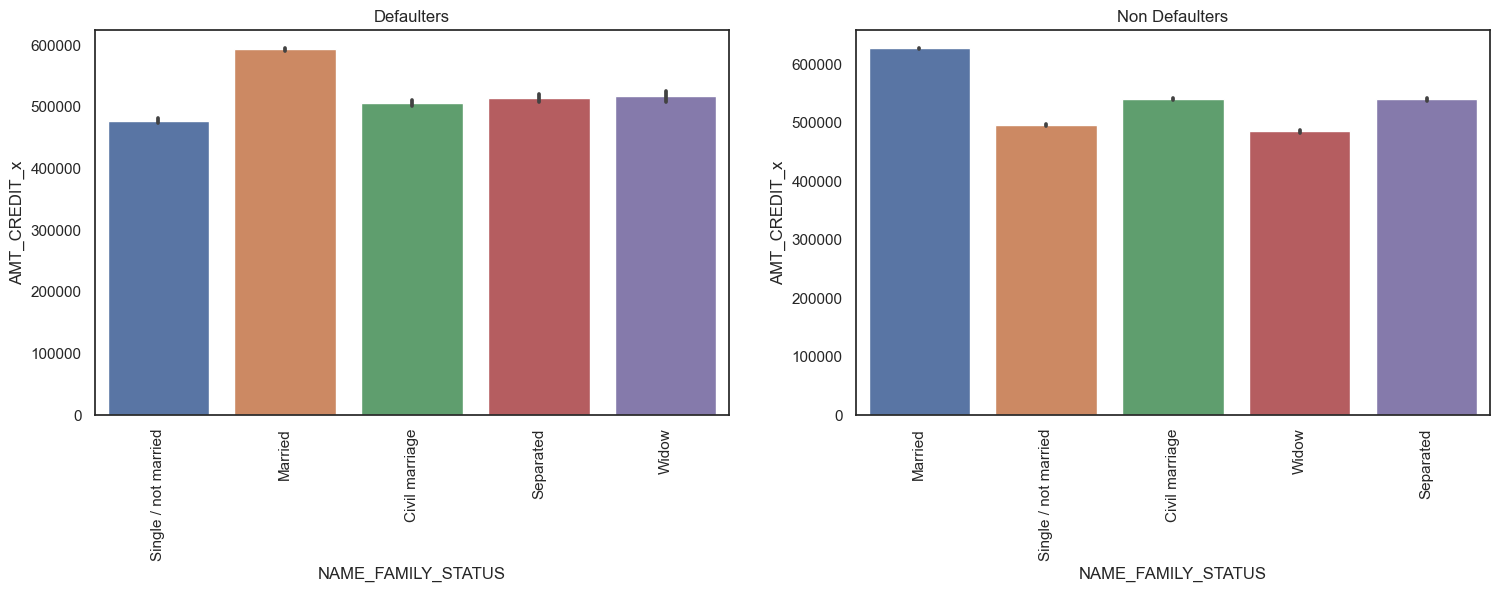

<Figure size 640x480 with 0 Axes>

In [199]:
plt.figure(figsize=(18,5))
plt.subplot(1,2,1)
plt.title('Defaulters')
sns.barplot(x=inp3.NAME_FAMILY_STATUS,y=inp3.AMT_CREDIT_x)
plt.xticks(rotation=90)

plt.subplot(1,2,2)
plt.title('Non Defaulters')
sns.barplot(x=inp4.NAME_FAMILY_STATUS,y=inp4.AMT_CREDIT_x)
plt.xticks(rotation=90)
plt.show()

Defaulters:
-  The data suggests that married individuals tend to have higher credit amounts and are more likely to default on their loans.
-  Both widows and separated individuals exhibit similar loan amounts, with median values at comparable levels.
-  Conversely, single individuals or those in civil marriages within the defaulter category tend to have lower credit amounts, typically ranging between 3 to 6 lakhs. Additionally, these groups share similar median credit amounts.
Non Defaulters:
-  Among non-defaulters, married individuals typically hold the highest credit amounts.
-  Individuals in civil marriages or those who are separated exhibit similar credit amounts, with comparable median values.
-  Likewise, single individuals and widows within the family status category tend to have similar credit amounts, typically ranging between 3 lakhs to slightly above 6 lakhs.


akhs.s.
nt.

##### AMT_ANNUITY_x vs AMT_CREDIT_x

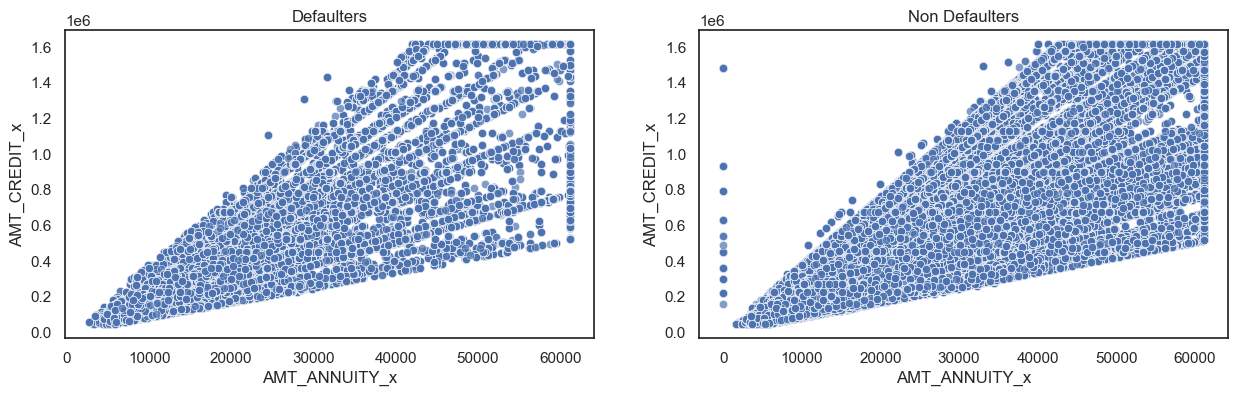

In [180]:
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
plt.title('Defaulters')
sns.scatterplot(x=inp3.AMT_ANNUITY_x,y=inp3.AMT_CREDIT_x,alpha=0.7)

plt.subplot(1,2,2)
plt.title('Non Defaulters')
sns.scatterplot(x=inp4.AMT_ANNUITY_x,y=inp4.AMT_CREDIT_x,alpha=0.7)
plt.show()

In [181]:
print ("Correlation b/w Annuity and Credit for defaulters",inp3.AMT_ANNUITY_x.corr(inp3.AMT_CREDIT_x))
print ("Correlation b/w Annuity and Credit for non defaulters",inp4.AMT_ANNUITY_x.corr(inp4.AMT_CREDIT_x))

Correlation b/w Annuity and Credit for defaulters 0.7544273956619973
Correlation b/w Annuity and Credit for non defaulters 0.7824205745701154


-  The scatterplots depicting Annuity against Credit reveal a positive and linear correlation between the two variables. Individuals with higher Annuity assets are more likely to obtain larger credit amounts, while those with lower Annuity assets tend to have lower credit amounts.

##### AMT_GOODS_PRICE_x vs AMT_CREDIT_x

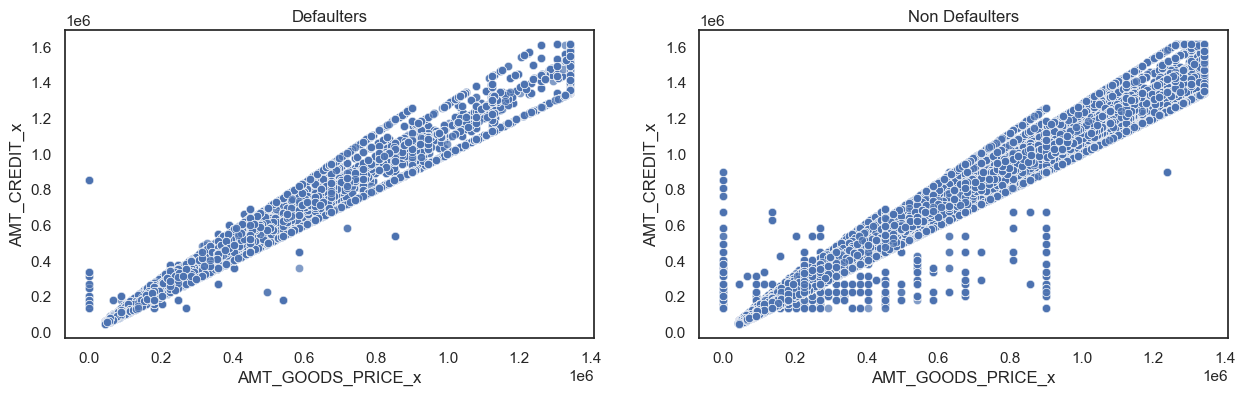

In [182]:
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
plt.title('Defaulters')
sns.scatterplot(x=inp3.AMT_GOODS_PRICE_x,y=inp3.AMT_CREDIT_x,alpha=0.7)

plt.subplot(1,2,2)
plt.title('Non Defaulters')
sns.scatterplot(x=inp4.AMT_GOODS_PRICE_x,y=inp4.AMT_CREDIT_x,alpha=0.7)
plt.show()

In [183]:
print ("Correlation b/w Goods Price and Credit for defaulters",inp3.AMT_GOODS_PRICE_x.corr(inp3.AMT_CREDIT_x))
print ("Correlation b/w Goods Price and Credit for non defaulters",inp4.AMT_GOODS_PRICE_x.corr(inp4.AMT_CREDIT_x))

Correlation b/w Goods Price and Credit for defaulters 0.9814277116586526
Correlation b/w Goods Price and Credit for non defaulters 0.9852846589318038


-  For defaulters, there exists a remarkably high correlation between Goods Price and Credit. Similarly, in non-defaulters, although the correlation remains positive and linear, a few outliers are evident. With a correlation of 98%, the relationship between the two variables is notably strong. In summary, it's apparent that as the goods price increases, the credit amount also tends to increase.

##### NAME_CLIENT_TYPE vs NAME_YIELD_GROUP with NAME_CONTRACT_STATUS

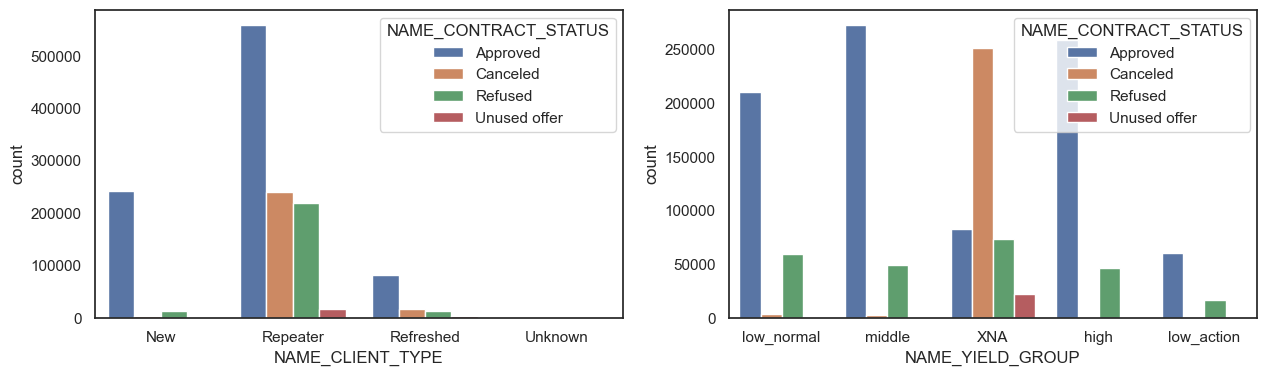

In [198]:
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
sns.countplot(x=inp2.NAME_CLIENT_TYPE,hue=inp2.NAME_CONTRACT_STATUS)

plt.subplot(1,2,2)
sns.countplot(x=inp2.NAME_YIELD_GROUP,hue=inp2.NAME_CONTRACT_STATUS)
plt.savefig('NAME_CLIENT_TYPE vs NAME_YIELD_GROUP with NAME_CONTRACT_STATUS.jpg')

Observations:
-  The plots reveal that individuals who have made multiple loan applications tend to have their loans approved, with the highest count of approved loans observed among this group.
-  Among the various yield groups, those categorized as "middle" show the highest frequency of approved loans, closely followed by individuals in the "high" yield group.roup.

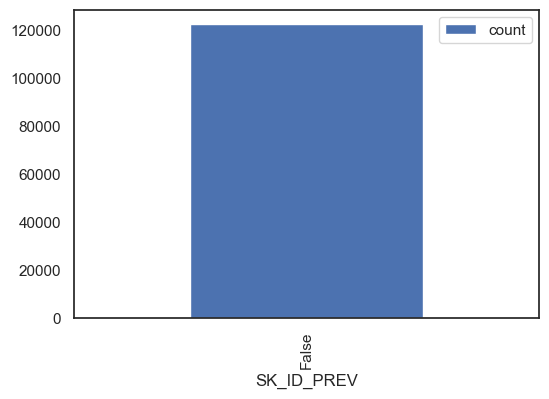

In [185]:
plt.figure(figsize=(6,4))
inp3['SK_ID_PREV'].isnull().value_counts().plot.bar()
plt.legend()

In [186]:
inp3.SK_ID_PREV.isnull().value_counts()

SK_ID_PREV
False    122360
Name: count, dtype: int64

-   Out of the applicants in the previous data (inp3), 122360 individuals are still categorized as defaulters. This implies that these 122360 people from the previous application dataset continue to encounter challenges in meeting their payment obligations on time.

<Axes: xlabel='NAME_CLIENT_TYPE', ylabel='count'>

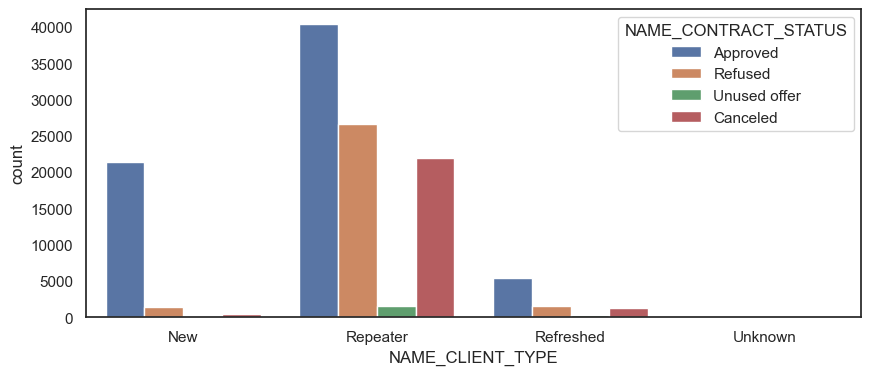

In [187]:
plt.figure(figsize=(10,4))
sns.countplot(x=inp3.NAME_CLIENT_TYPE,hue=inp3.NAME_CONTRACT_STATUS)

-  The observation from the above countplot is that there are major amount of repeaters data are in the current data who have applied for loan previously and are defaulters at present.

### Multivariate Analysis

##### CODE_GENDER, NAME_INCOME_TYPE , AMT_CREDIT_x

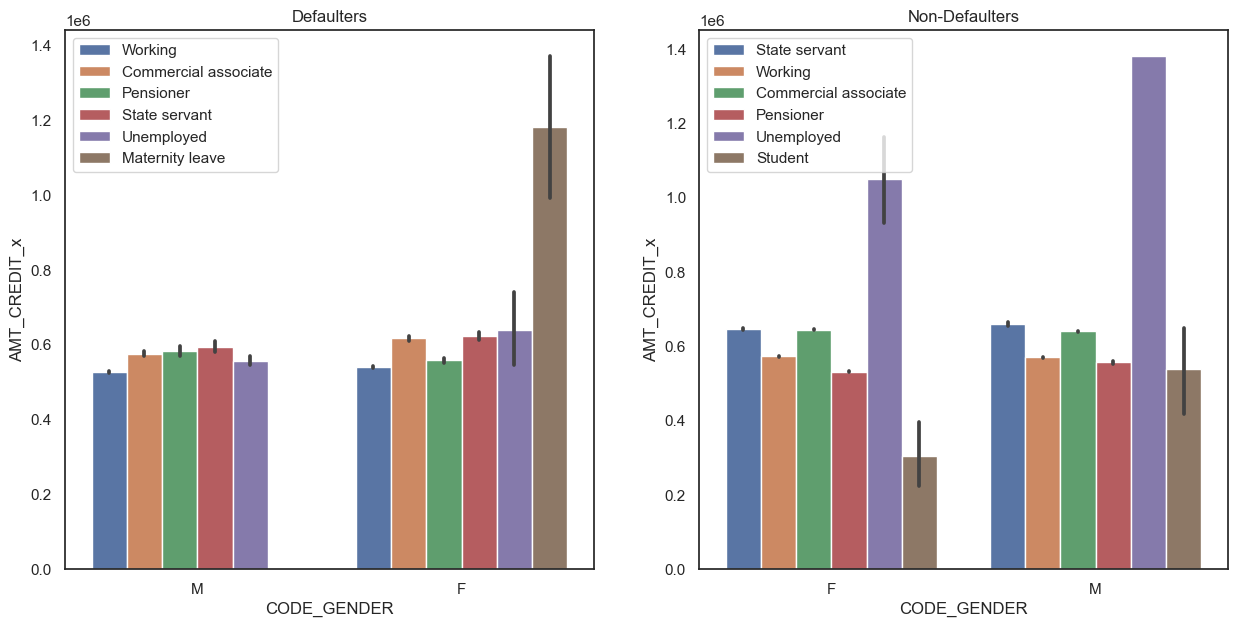

In [188]:
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
plt.title('Defaulters')
sns.barplot(x=inp3.CODE_GENDER,y=inp3.AMT_CREDIT_x,hue=inp3.NAME_INCOME_TYPE)
plt.legend(loc='upper left')

plt.subplot(1,2,2)
plt.title('Non-Defaulters')
sns.barplot(x=inp4.CODE_GENDER,y=inp4.AMT_CREDIT_x,hue=inp4.NAME_INCOME_TYPE)
plt.legend(loc='upper left')

Defaulters:
-   Among female defaulters, those on maternity leave exhibit a tendency to secure higher credit amounts, emerging as the major defaulters.
In contrast, among male defaulters, individuals employed by the state or working as commercial associates are inclined to take out larger loans. Consequently, in the case of defaulters, caution should be exercised by banks when considering loan applications from pregnant women.
Non-Defaulters:
-  The plot clearly indicates that both male and female businessmen are prominent among non-defaulters, frequently securing higher loan amounts. Therefore, these individuals represent a reliable option for banks when considering loan approval.
-  Also an important thing to note is that businessman and student category are not in defaulters category.l.omen.

##### CODE_GENDER, AMT_CREDIT_x, Age

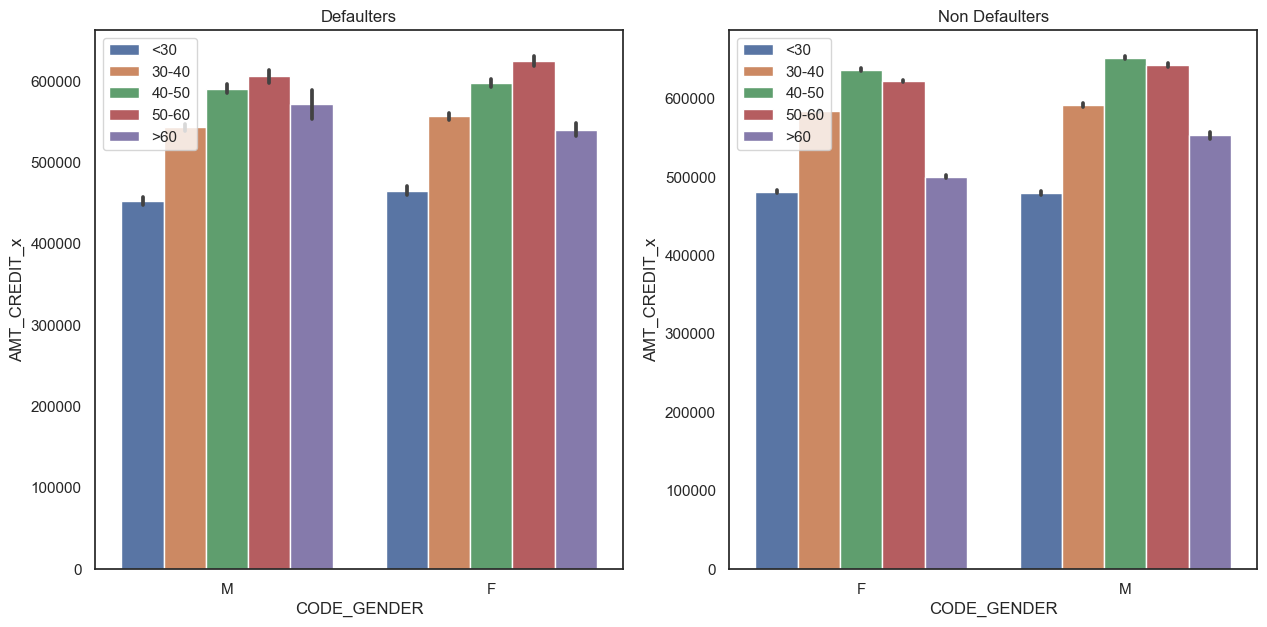

In [189]:
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
plt.title('Defaulters')
sns.barplot(x=inp3.CODE_GENDER,y=inp3.AMT_CREDIT_x,hue=inp3.Age)
plt.legend(loc='upper left')

plt.subplot(1,2,2)
plt.title('Non Defaulters')
sns.barplot(x=inp4.CODE_GENDER,y=inp4.AMT_CREDIT_x,hue=inp4.Age)
plt.legend(loc='upper left')

-  In the defaulters category, it's apparent that males aged between 50-60 and 40-50 tend to take higher credit amounts and are also defaulters. Similarly, among females, those in the age groups of 50-60 and 40-50 show higher credit uptake, followed by older individuals (>60) and young adults (30-40). The demographic of young adult males and females appears to be a safer option for banks to provide loans, as there are fewer defaulters in this category. However, this should be accompanied by thorough checks and background scrutiny.
-  In non defaulters maximum loan is with middle aged (40-50) male and female followed by old aged and young adults.

##### Author:-

#### Akshar patel.